In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser

In [3]:
df = pd.read_csv("result.csv")
df.head()

,rc_ty,url,author,closer,auther_is_closer,participants_total,participants_bot,participants_member,participants_contributer,participants_user,create_time,life_time_sec,first_event_time_sec,first_comment_time_sec,commit_count,comment_count,end
0,Issue,"""https://github.com/guzzle/guzzle/issues/3221""",User,Member,False,2,0,1,0,1,2024-05-29 14:39:44 +00:00,2384,-1,2384,0,1,Green
1,Issue,"""https://github.com/guzzle/guzzle/issues/3217""",User,Member,False,2,0,1,0,1,2024-05-04 10:35:18 +00:00,1229,-1,1229,0,1,Green
2,Issue,"""https://github.com/guzzle/guzzle/issues/3216""",User,Member,False,2,0,1,0,1,2024-05-02 19:19:27 +00:00,8868,-1,8868,0,2,Green
3,PR,"""https://github.com/guzzle/guzzle/pull/3213""",User,User,True,1,0,0,0,1,2024-03-31 21:33:43 +00:00,209,-1,-1,2,0,Green
4,PR,"""https://github.com/guzzle/guzzle/pull/3212""",User,User,True,1,0,0,0,1,2024-03-31 21:32:34 +00:00,217,-1,-1,2,0,Green


In [4]:
def set_type(c):
    if c['life_day'] > 60:
        return "xlong"
    elif c['life_day'] > 14:
        return "long"
    elif c['life_day'] > 3:
        return "mid"
    elif c['life_day'] > 1:
        return "short"
    elif c['life_day'] > 0:
        return "xshort"
    else:
        return "zero"

In [5]:
df['create_time'] = df.apply(lambda row: ( dateutil.parser.parse(row.create_time) ), axis=1 )

In [64]:
df['bot_ratio'] = df.apply(lambda row: row.participants_bot / row.participants_total , axis=1 )
df['has_bot'] = df.apply(lambda row: row.participants_bot > 0 , axis=1 )
df['life_day'] = df.apply(lambda row: row.life_time_sec / (60 * 60 * 24 ) , axis=1 )
df['idle_time'] = df.apply(lambda row: ( (row.first_comment_time_sec  + 1 ) / (row.life_time_sec + 1) ) , axis=1 )
df['ymonth'] = df.apply(lambda row: ( row.create_time.strftime("%Y-%m") ), axis=1 )
df['life_type'] = df.apply(lambda row: (set_type(row)),axis=1)

In [65]:
dfs = df.sort_values(by=['life_day','idle_time'])
iss = dfs[(dfs["rc_ty"]=="Issue") & (dfs["life_time_sec"] >= 0)]
prs = dfs[(dfs["rc_ty"]=="PR") & (dfs["life_time_sec"] >= 0)]
dfs

,rc_ty,url,author,closer,auther_is_closer,participants_total,participants_bot,participants_member,participants_contributer,participants_user,...,first_comment_time_sec,commit_count,comment_count,end,bot_ratio,has_bot,life_day,idle_time,ymonth,life_type
307463,Issue,"""https://github.com/Leaflet/Leaflet/pull/1118""",Contributer,User,False,2,0,0,1,1,...,16,1,1,Green,0.0,False,-0.000104,-2.125000,2012-11,zero
132842,Issue,"""https://github.com/fastai/fastbook/issues/443""",User,User,True,1,0,0,0,1,...,-1,0,0,Green,0.0,False,0.000000,0.000000,2021-05,zero
132843,Issue,"""https://github.com/fastai/fastbook/issues/442""",User,User,True,1,0,0,0,1,...,-1,0,0,Green,0.0,False,0.000000,0.000000,2021-05,zero
132844,Issue,"""https://github.com/fastai/fastbook/issues/441""",User,User,True,1,0,0,0,1,...,-1,0,0,Green,0.0,False,0.000000,0.000000,2021-05,zero
177245,Issue,"""https://github.com/microsoft/TypeScript/issue...",User,User,True,2,0,0,0,2,...,-1,0,0,Green,0.0,False,0.000000,0.000000,2023-10,zero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319456,Issue,"""https://github.com/scrapy/scrapy/issues/113""",User,Member,False,6,0,3,0,3,...,25313542,0,3,Green,0.0,False,4016.555544,0.072943,2012-04,xlong
147090,Issue,"""https://github.com/nodejs/node-v0.x-archive/i...",User,User,False,5,0,0,0,5,...,166992,0,2,Green,0.0,False,4052.971586,0.000477,2012-03,xlong
147306,Issue,"""https://github.com/nodejs/node-v0.x-archive/i...",User,User,False,6,0,1,0,5,...,17215,0,4,Green,0.0,False,4091.350961,0.000049,2012-02,xlong
147776,Issue,"""https://github.com/nodejs/node-v0.x-archive/i...",User,User,False,6,0,0,0,6,...,43908980,0,2,Green,0.0,False,4166.230093,0.121982,2011-11,xlong


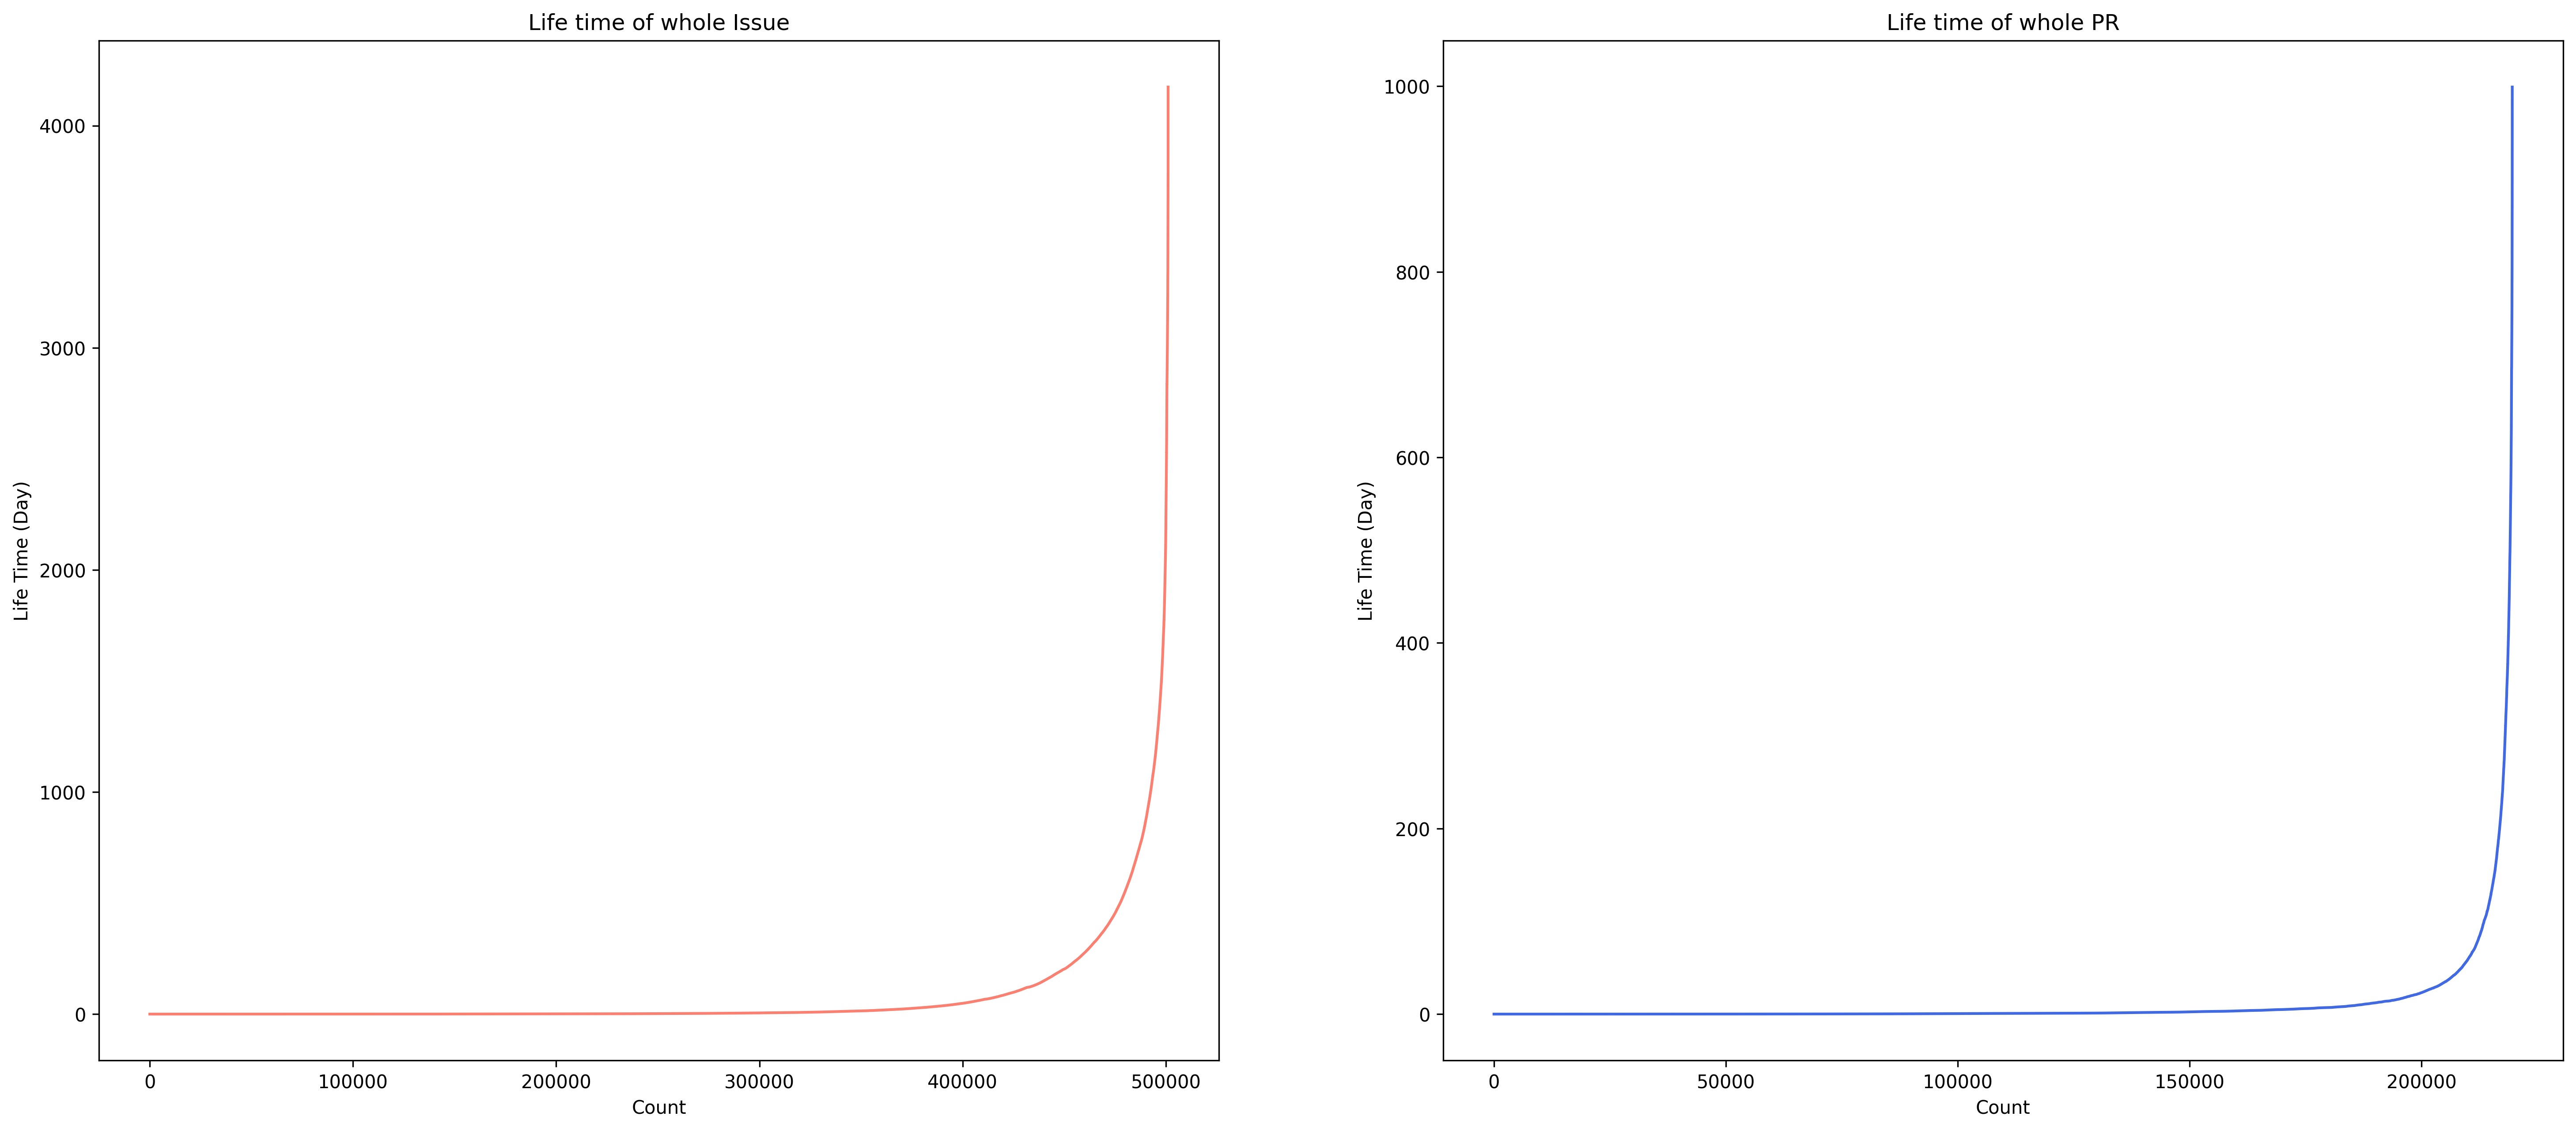

In [10]:
fig = plt.figure(figsize=(24,10),dpi=300)
l1  = fig.add_subplot(1,2,1)
r1  = fig.add_subplot(1,2,2)

def draw_lifetime_whole(df: pd.DataFrame,pl,name:str,color:str):
    xi = list(range(len(df)))
    pl.set_title(f"Life time of whole {name}")
    pl.set_xlabel("Count")
    pl.set_ylabel("Life Time (Day)")
    pl.plot(xi,df['life_day'],color=color)

draw_lifetime_whole(iss,l1,"Issue","salmon")
draw_lifetime_whole(prs,r1,"PR","royalblue")

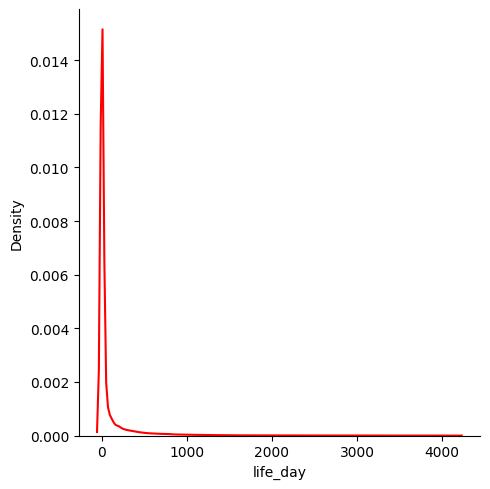

In [9]:
sns.displot(data = iss,kind="kde", x="life_day", color = 'red')

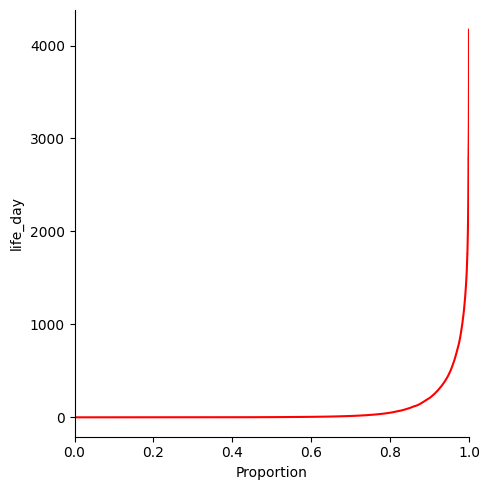

In [11]:
sns.displot(data = iss,kind="ecdf", y="life_day", color = 'red')

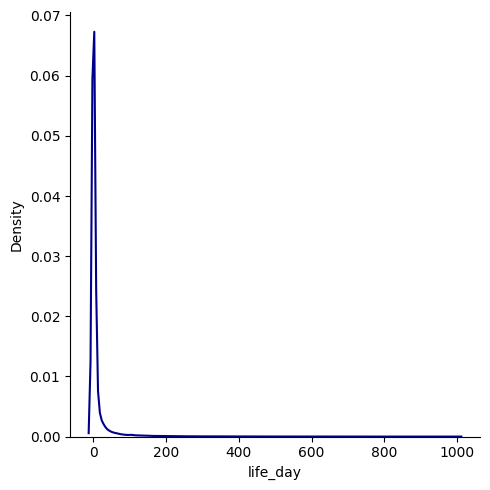

In [8]:
sns.displot(data = prs,kind="kde", x="life_day", color = 'darkblue')

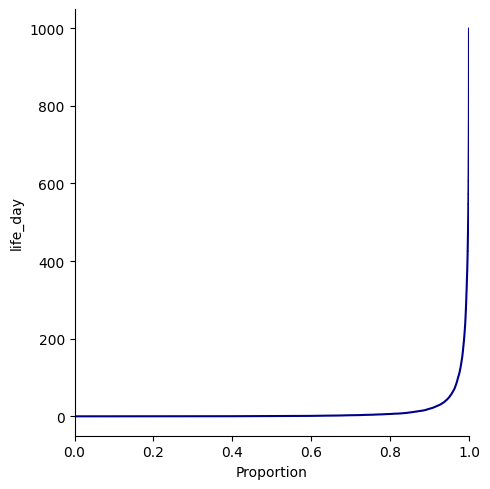

In [12]:
sns.displot(data = prs,kind="ecdf", y="life_day", color = 'darkblue')

In [13]:
len(iss)

501129

In [14]:
iss_mid=iss[(iss["life_day"] < 100)]
len(iss_mid)

425731

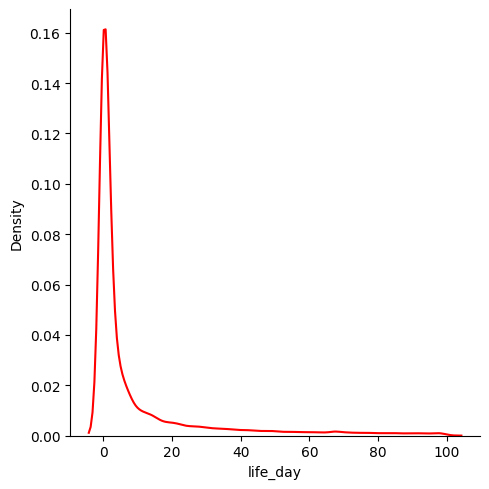

In [15]:
sns.displot(data = iss_mid,kind="kde", x="life_day", color = 'red')

In [16]:
iss_low=iss[(iss["life_day"] < 14)]
len(iss_low)

348679

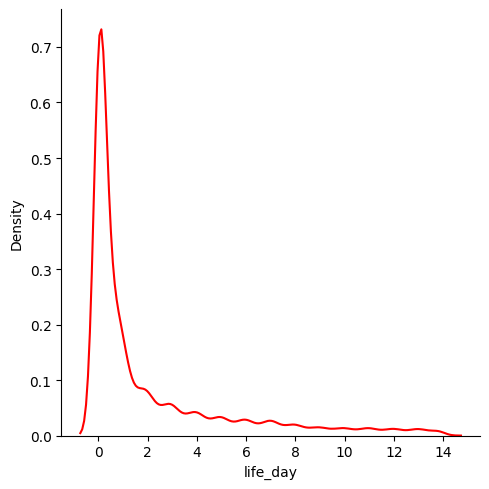

In [17]:
sns.displot(data = iss_low,kind="kde", x="life_day", color = 'red')

In [18]:
iss_vlow=iss[(iss["life_day"] < 3)]
len(iss_vlow)

270177

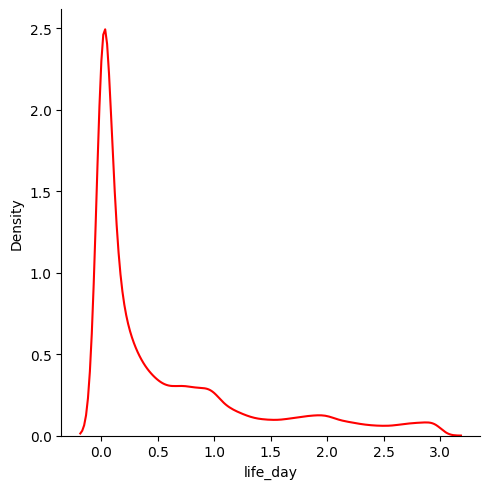

In [19]:
sns.displot(data = iss_vlow,kind="kde", x="life_day", color = 'red')

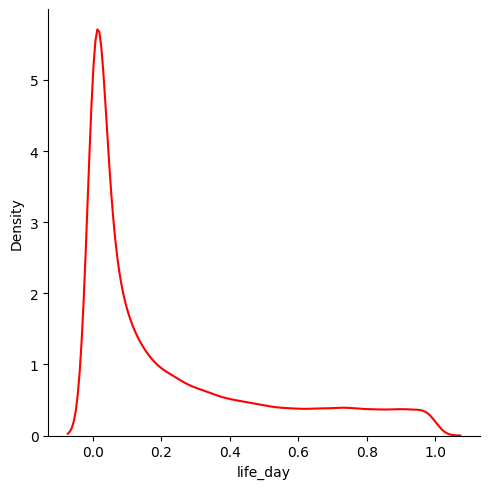

In [20]:
iss_xlow=iss[(iss["life_day"] < 1)]
sns.displot(data = iss_xlow,kind="kde", x="life_day", color = 'red')

In [21]:
iss_xlow

,rc_ty,url,author,closer,auther_is_closer,participants_total,participants_bot,participants_member,participants_contributer,participants_user,...,first_comment_time_sec,commit_count,comment_count,end,bot_ratio,has_bot,life_day,idle_time,ymonth,life_type
132842,Issue,"""https://github.com/fastai/fastbook/issues/443""",User,User,True,1,0,0,0,1,...,-1,0,0,Green,0.000000,False,0.000000,0.000000,202105,zero
132843,Issue,"""https://github.com/fastai/fastbook/issues/442""",User,User,True,1,0,0,0,1,...,-1,0,0,Green,0.000000,False,0.000000,0.000000,202105,zero
132844,Issue,"""https://github.com/fastai/fastbook/issues/441""",User,User,True,1,0,0,0,1,...,-1,0,0,Green,0.000000,False,0.000000,0.000000,202105,zero
177245,Issue,"""https://github.com/microsoft/TypeScript/issue...",User,User,True,2,0,0,0,2,...,-1,0,0,Green,0.000000,False,0.000000,0.000000,202310,zero
177407,Issue,"""https://github.com/microsoft/TypeScript/issue...",User,User,True,1,0,0,0,1,...,-1,0,0,Green,0.000000,False,0.000000,0.000000,202309,zero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390082,Issue,"""https://github.com/go-gitea/gitea/issues/26940""",User,User,True,4,1,1,0,2,...,85583,0,10,Green,0.250000,True,0.999942,0.990601,202309,xshort
133228,Issue,"""https://github.com/fastai/fastbook/pull/16""",Contributer,Member,False,3,1,1,1,0,...,7,1,3,Red,0.333333,True,0.999954,0.000093,202003,xshort
587403,Issue,"""https://github.com/TheAlgorithms/Python/pull/...",User,Member,False,2,0,1,0,1,...,86396,1,1,Red,0.000000,False,0.999954,1.000000,202010,xshort
429977,Issue,"""https://github.com/beego/beego/pull/4235""",User,User,True,1,0,0,0,1,...,-1,1,0,Green,0.000000,False,0.999977,0.000000,202009,xshort


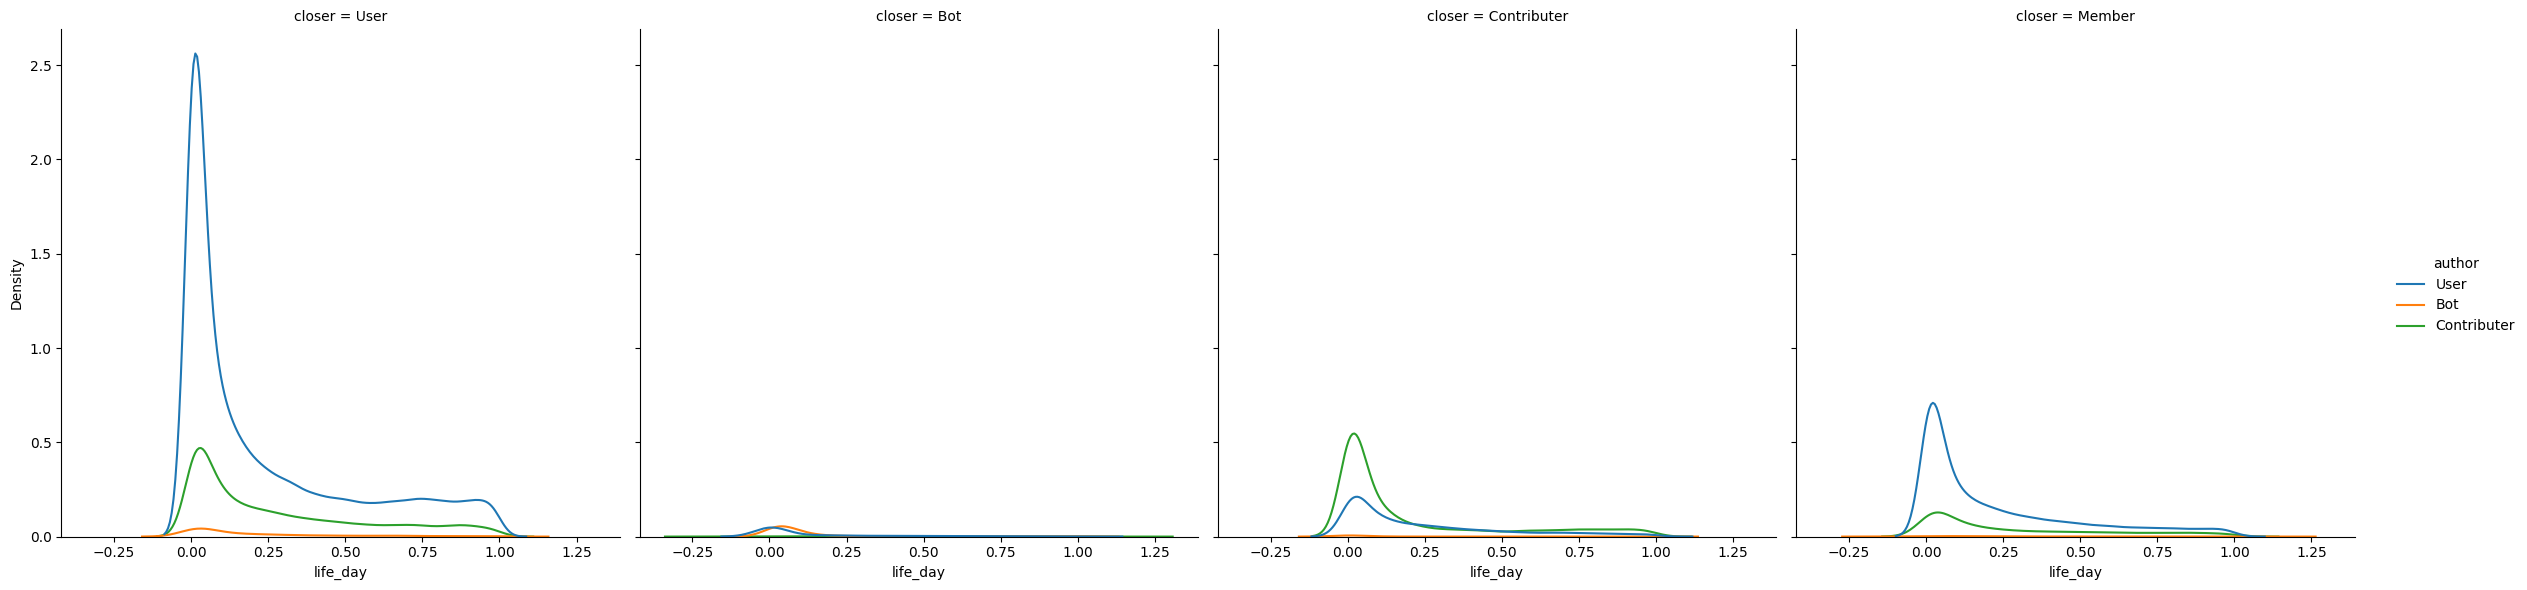

In [22]:
sns.displot(data=iss_xlow,x="life_day", kind="kde",hue="author",col="closer",height=6)

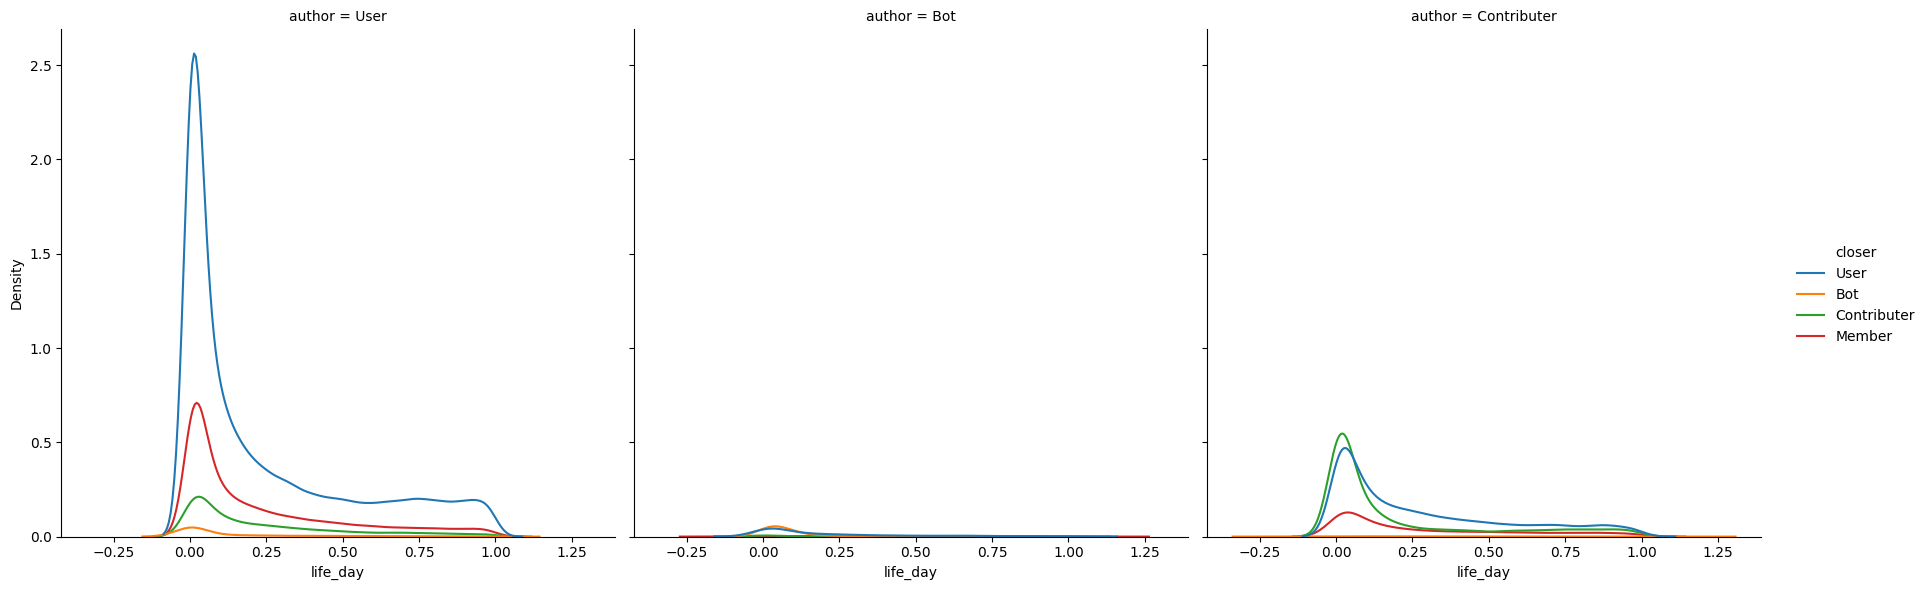

In [23]:
sns.displot(data=iss_xlow,x="life_day", kind="kde",hue="closer",col="author",height=6)

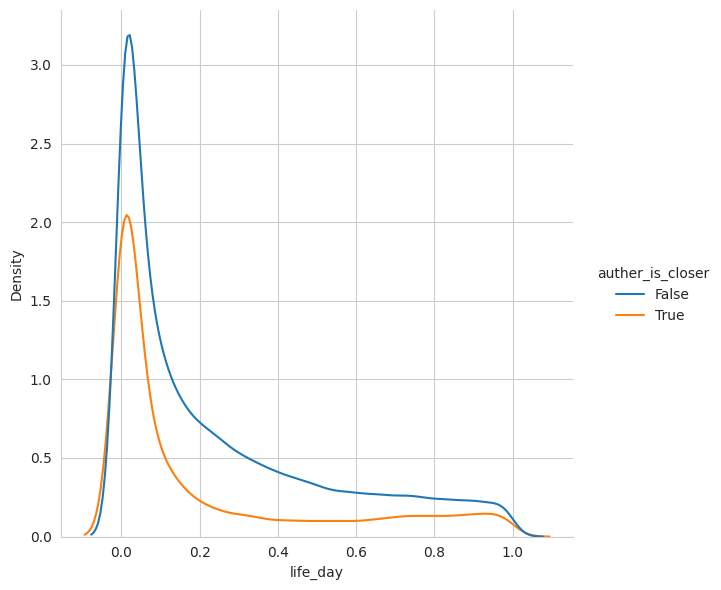

In [24]:
sns.set_style("whitegrid")
sns.displot(data=iss_xlow, x="life_day", kind="kde",hue="auther_is_closer", height=6)

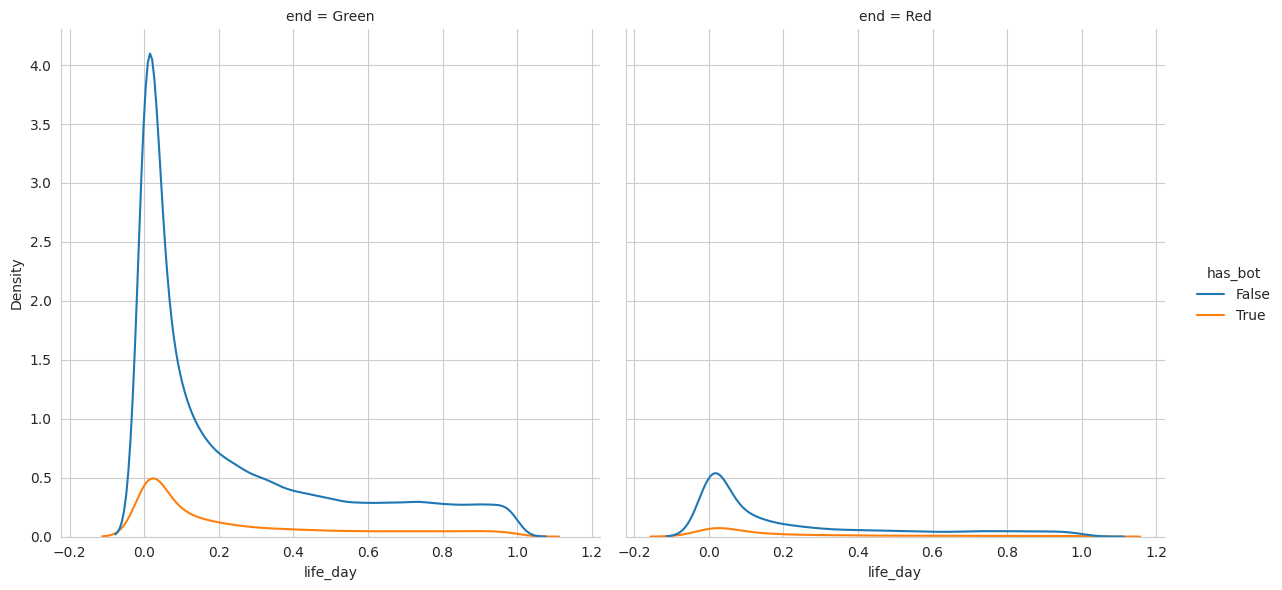

In [22]:
sns.displot(data=iss_xlow, x="life_day", kind="kde",hue="has_bot", height=6,col="end")

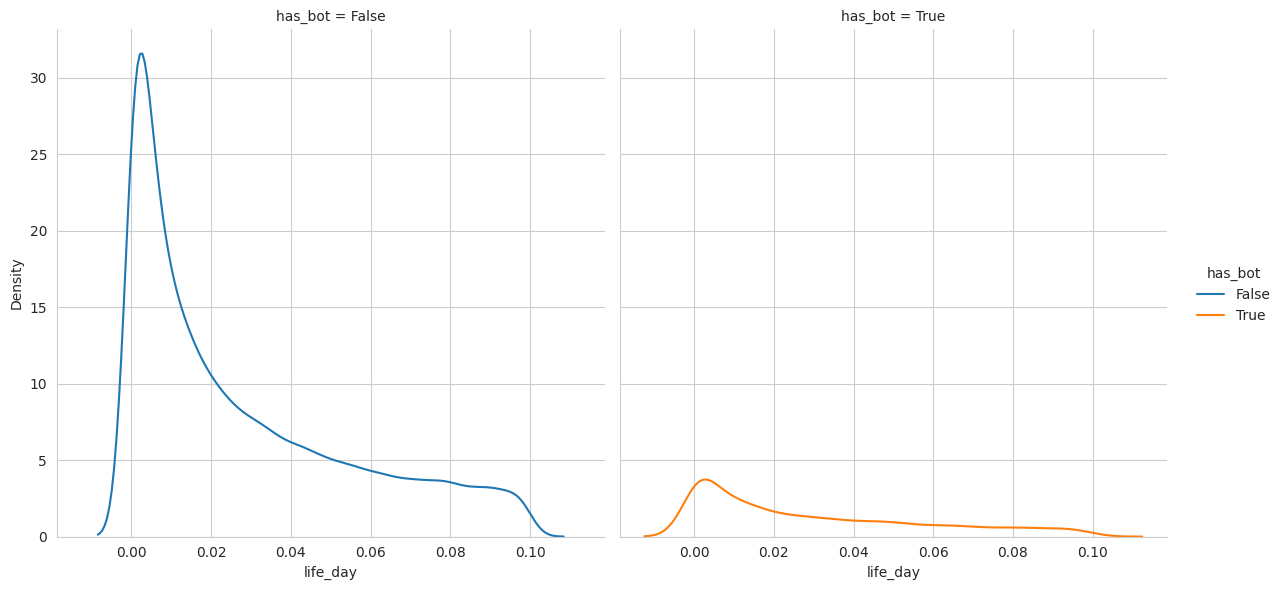

In [23]:
iss_xxlow=iss[(iss["life_day"] < 0.1)]
sns.displot(data=iss_xxlow, x="life_day", kind="kde",hue="has_bot", height=6,col="has_bot")

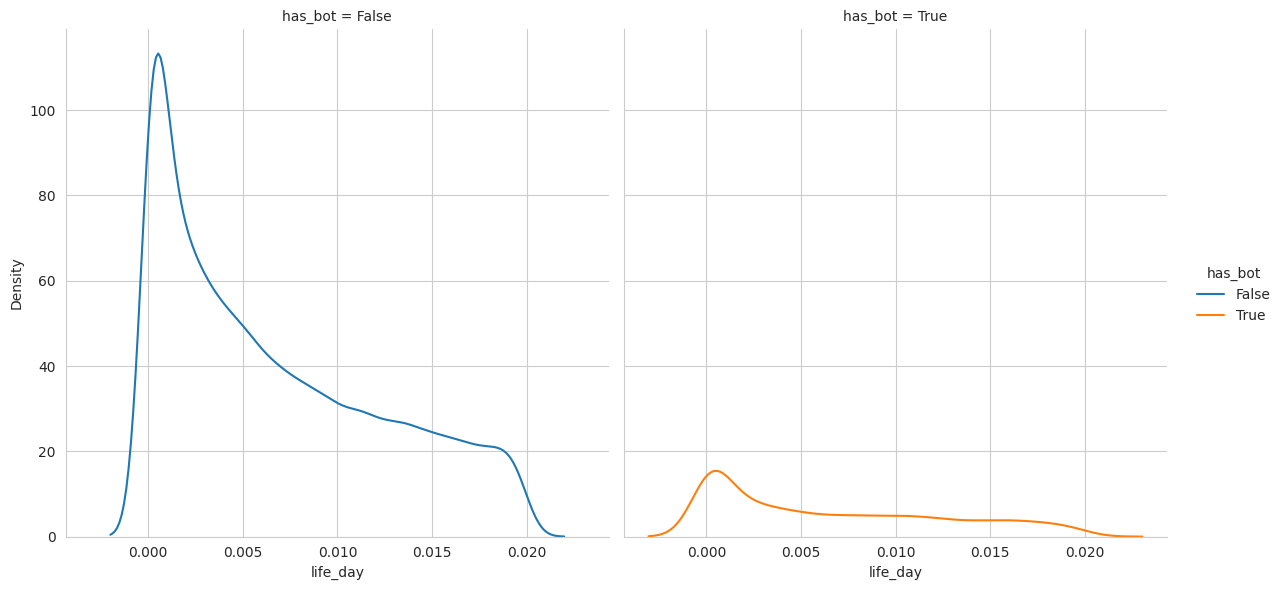

In [24]:
iss_xxlow=iss[(iss["life_day"] < 0.02)]
sns.displot(data=iss_xxlow, x="life_day", kind="kde",hue="has_bot", height=6,col="has_bot")

In [25]:
iss_xxlow

,rc_ty,url,author,closer,auther_is_closer,participants_total,participants_bot,participants_member,participants_contributer,participants_user,...,life_time_sec,first_event_time_sec,first_comment_time_sec,commit_count,comment_count,end,bot_ratio,has_bot,life_day,idle_time
132842,Issue,"""https://github.com/fastai/fastbook/issues/443""",User,User,True,1,0,0,0,1,...,0,-1,-1,0,0,Green,0.0,False,0.000000,0.000000
132843,Issue,"""https://github.com/fastai/fastbook/issues/442""",User,User,True,1,0,0,0,1,...,0,-1,-1,0,0,Green,0.0,False,0.000000,0.000000
132844,Issue,"""https://github.com/fastai/fastbook/issues/441""",User,User,True,1,0,0,0,1,...,0,-1,-1,0,0,Green,0.0,False,0.000000,0.000000
177245,Issue,"""https://github.com/microsoft/TypeScript/issue...",User,User,True,2,0,0,0,2,...,0,-1,-1,0,0,Green,0.0,False,0.000000,0.000000
177407,Issue,"""https://github.com/microsoft/TypeScript/issue...",User,User,True,1,0,0,0,1,...,0,-1,-1,0,0,Green,0.0,False,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527263,Issue,"""https://github.com/wagtail/wagtail/issues/6103""",Contributer,User,False,2,0,0,1,1,...,1727,-1,1727,0,2,Green,0.0,False,0.019988,1.000000
601005,Issue,"""https://github.com/appwrite/appwrite/pull/156""",User,Member,False,2,0,1,0,1,...,1727,-1,1727,1,1,Red,0.0,False,0.019988,1.000000
603721,Issue,"""https://github.com/huggingface/pytorch-image-...",User,User,False,2,0,0,0,2,...,1727,-1,1727,0,2,Green,0.0,False,0.019988,1.000000
613636,Issue,"""https://github.com/shadcn-ui/ui/issues/2794""",User,User,True,1,0,0,0,1,...,1727,-1,1727,0,1,Green,0.0,False,0.019988,1.000000


In [26]:
len(prs)

219549

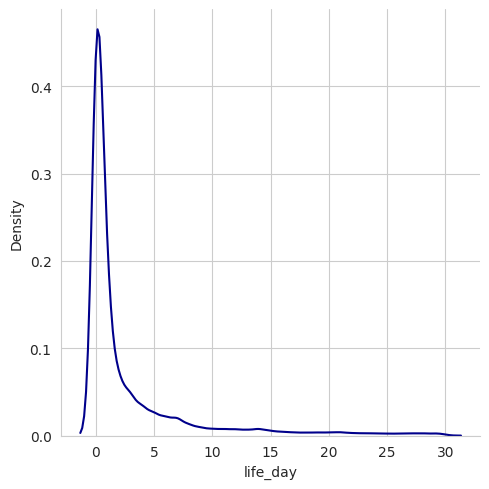

In [27]:
prs_mid = prs[(prs["life_day"]<30)]
sns.displot(data = prs_mid,kind="kde", x="life_day", color = 'darkblue')

In [28]:
prs_low = prs[(prs["life_day"]<7)]

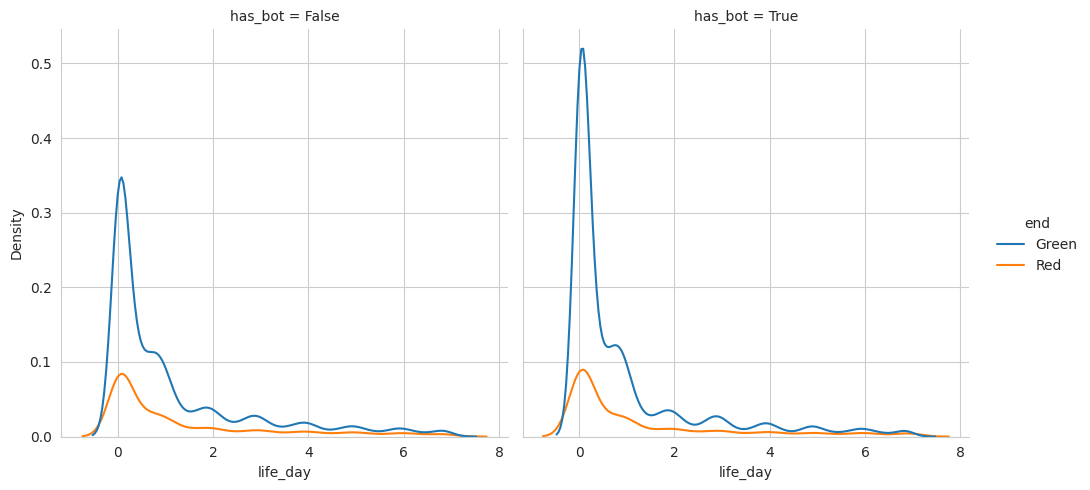

In [29]:
prs_low = prs[(prs["life_day"]<7)]
sns.displot(data = prs_low,kind="kde", x="life_day", color = 'darkblue',hue="end",col="has_bot")

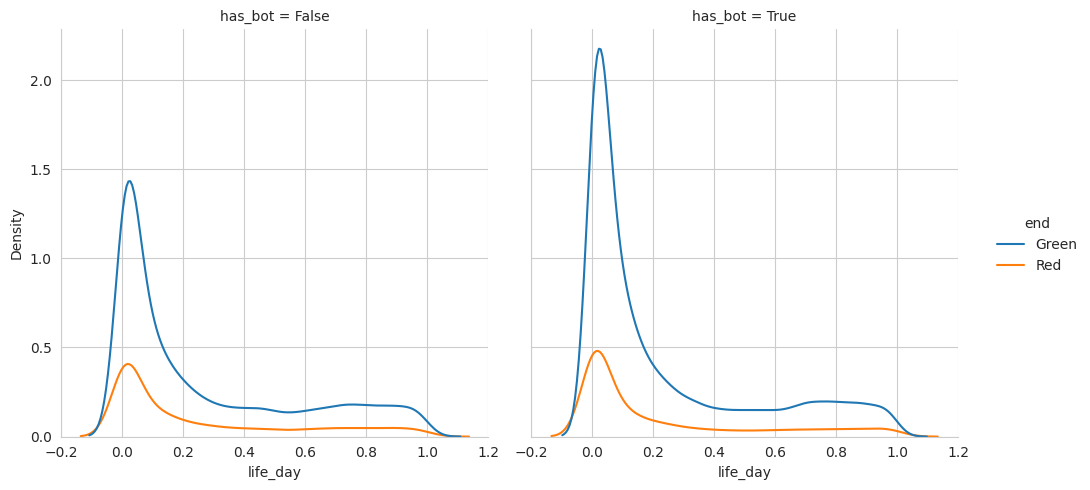

In [30]:
prs_xlow = prs[(prs["life_day"]<1)]
sns.displot(data = prs_xlow,kind="kde", x="life_day", color = 'darkblue',hue="end",col="has_bot")

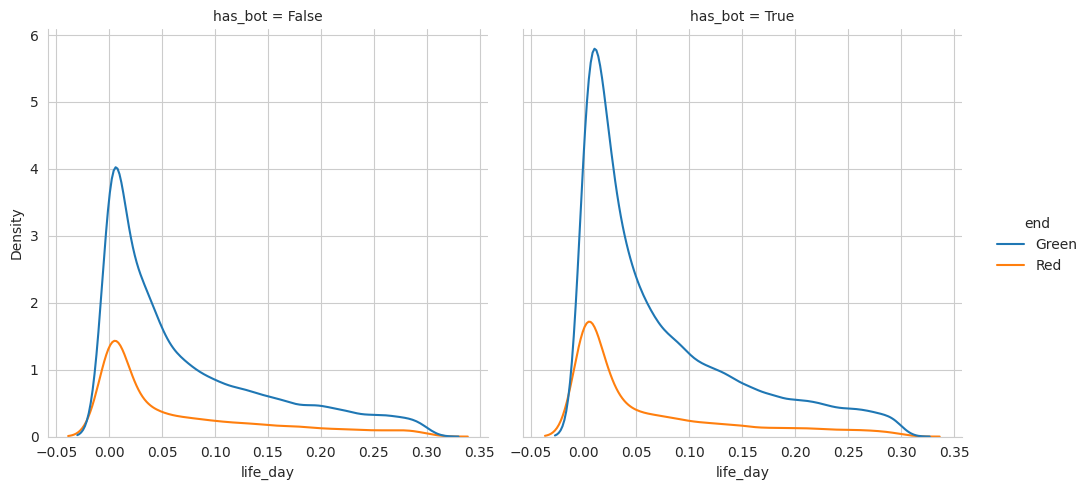

In [31]:
prs_xxlow = prs[(prs["life_day"]<0.3)]
sns.displot(data = prs_xxlow,kind="kde", x="life_day", color = 'darkblue',hue="end",col="has_bot")

(<seaborn.axisgrid.FacetGrid at 0x7b6e3671a660>,)

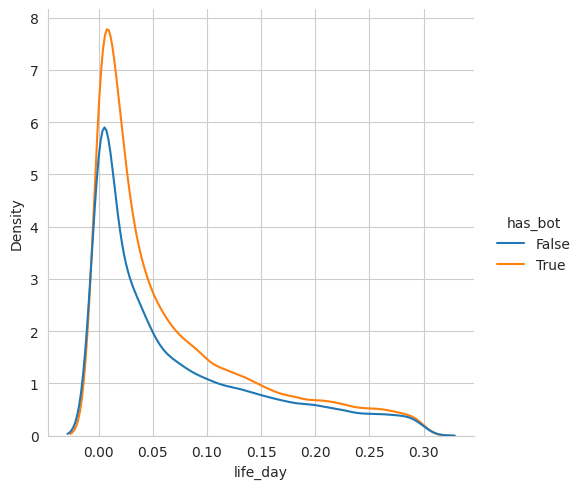

In [37]:
prs_xxlow = prs[(prs["life_day"]<0.3)]
sns.displot(data = prs_xxlow,kind="kde", x="life_day", color = 'darkblue',hue="has_bot"),

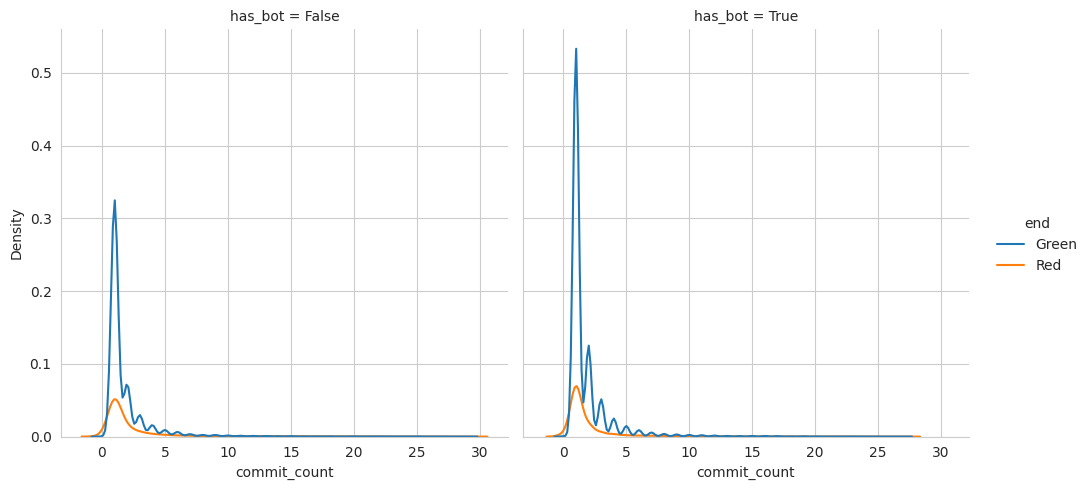

In [32]:
prs_xxlow = prs[(prs["life_day"]<0.3)]
sns.displot(data = prs_xxlow,kind="kde", x="commit_count", color = 'darkblue',hue="end",col="has_bot")

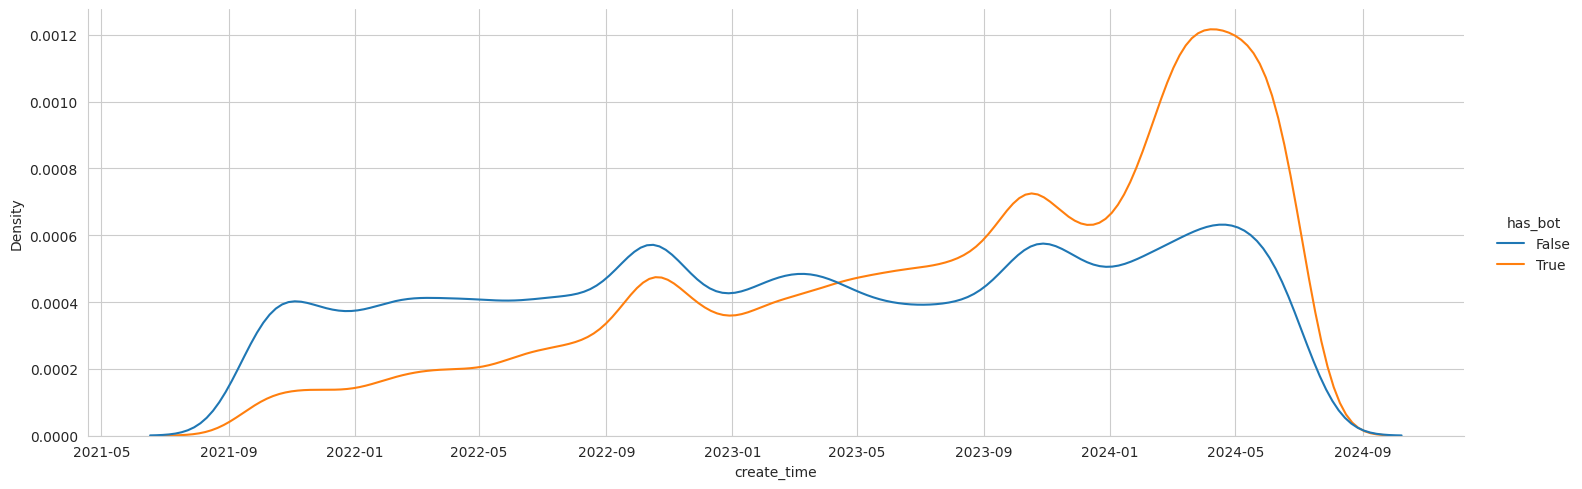

In [25]:
sns.displot(data = prs, kind="kde", x="create_time",hue="has_bot", color = 'darkblue',aspect=3)

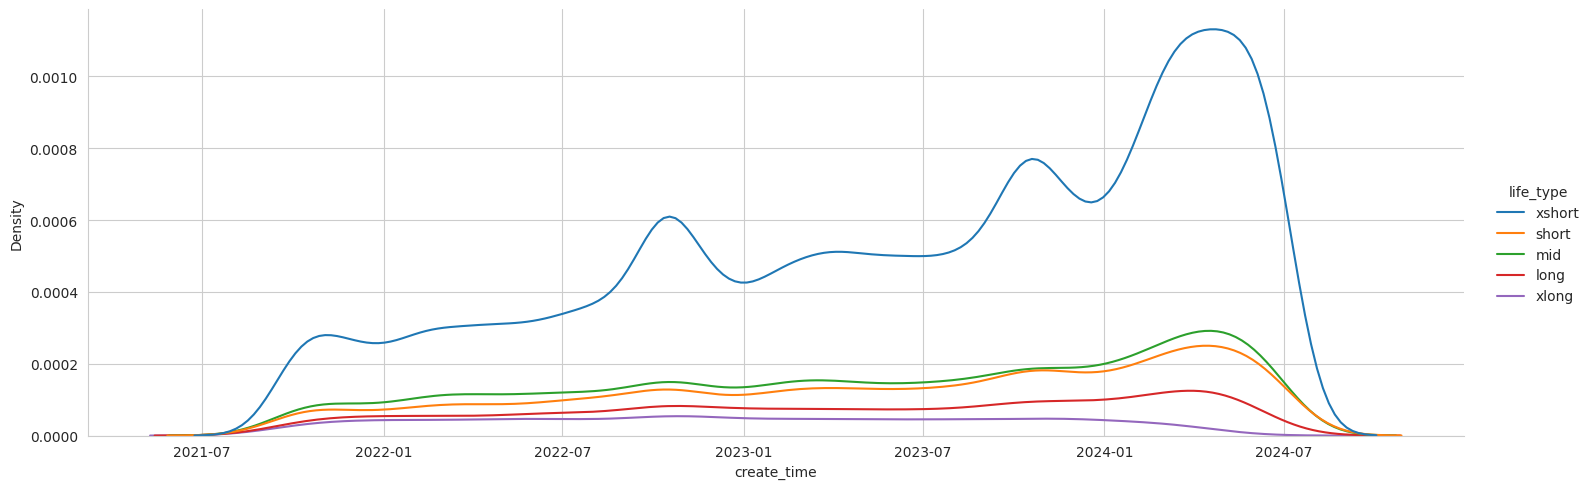

In [26]:
sns.displot(data = prs, kind="kde", x="create_time",hue="life_type", color = 'darkblue',aspect=3)

In [66]:
prs_g = prs.drop(columns=['rc_ty','url','author','closer','auther_is_closer','end','create_time'])

In [71]:
prs_g['time'] =  prs_g.apply(lambda row: ( dateutil.parser.parse(row.ymonth) ), axis=1 )
prs_g1 = prs_g.groupby(['ymonth','life_type']).mean()

In [68]:
prs_g1

participants_total  participants_bot  participants_member  \
ymonth  life_type                                                              
2021-09 long                 3.490323          0.277419             0.335484   
        mid                  3.552553          0.309309             0.327327   
        short                3.413793          0.255172             0.317241   
        xlong                3.880503          0.358491             0.333333   
        xshort               2.758583          0.445183             0.241417   
...                               ...               ...                  ...   
2024-06 short                5.780037          1.071473             0.635243   
        xshort               5.210969          1.209040             0.590740   
2024-07 mid                  6.362963          0.903704             0.666667   
        short                5.447368          0.924812             0.548872   
        xshort               5.073571          1.180532             0.544426   

                   participants_contributer  participants_user  life_time_sec  \
ymonth  life_type                                                               
2021-09 long                       1.161290           1.716129   2.582025e+06   
        mid                        1.114114           1.801802   5.773385e+05   
        short                      0.951724           1.889655   1.574499e+05   
        xlong                      1.056604           2.132075   2.454901e+07   
        xshort                     0.687708           1.384275   2.171569e+04   
...                                     ...                ...            ...   
2024-06 short                      0.778805           3.294516   1.601213e+05   
        xshort                     0.638556           2.772633   2.146505e+04   
2024-07 mid                        0.718519           4.074074   4.404467e+05   
        short                      0.789474           3.184211   1.478403e+05   
        xshort                     0.580645           2.767968   1.994484e+04   

                   first_event_time_sec  first_comment_time_sec  commit_count  \
ymonth  life_type                                                               
2021-09 long                       -1.0            6.357581e+05      3.270968   
        mid                        -1.0            1.328527e+05      3.081081   
        short                      -1.0            2.152865e+05      2.420690   
        xlong                      -1.0            6.073926e+06      2.559748   
        xshort                     -1.0            2.063931e+05      2.081949   
...                                 ...                     ...           ...   
2024-06 short                      -1.0            3.078057e+04      2.499692   
        xshort                     -1.0            5.433095e+03      1.922558   
2024-07 mid                        -1.0            6.105023e+04      2.096296   
        short                      -1.0            2.564029e+04      2.676692   
        xshort                     -1.0            3.546331e+03      1.845501   

                   comment_count  bot_ratio   has_bot    life_day  \
ymonth  life_type                                                   
2021-09 long            3.412903   0.083095  0.200000   29.884545   
        mid             2.063063   0.094863  0.252252    6.682158   
        short           1.551724   0.073671  0.172414    1.822336   
        xlong           5.308176   0.101599  0.264151  284.132076   
        xshort          1.056478   0.151238  0.289037    0.251339   
...                          ...        ...       ...         ...   
2024-06 short           2.146642   0.226690  0.613678    1.853256   
        xshort          1.430481   0.280346  0.675210    0.248438   
2024-07 mid             3.229630   0.210993  0.637037    5.097762   
        short           2.120301   0.223393  0.624060    1.711115   
        xshort          1.333333   0.28503

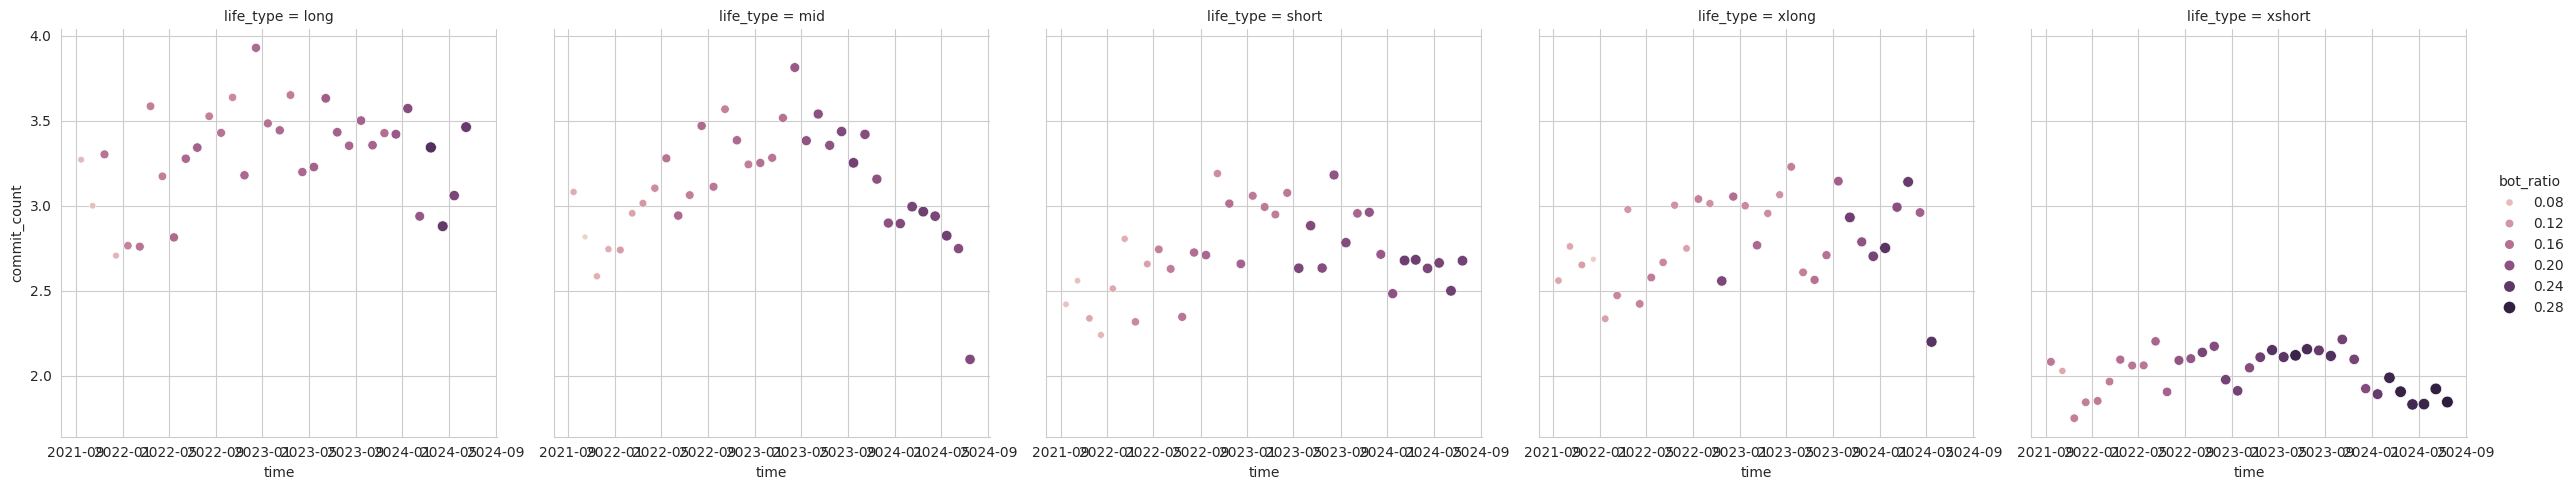

In [69]:
sns.relplot(data = prs_g1,x='time',y='commit_count',col='life_type',size='bot_ratio',hue='bot_ratio')

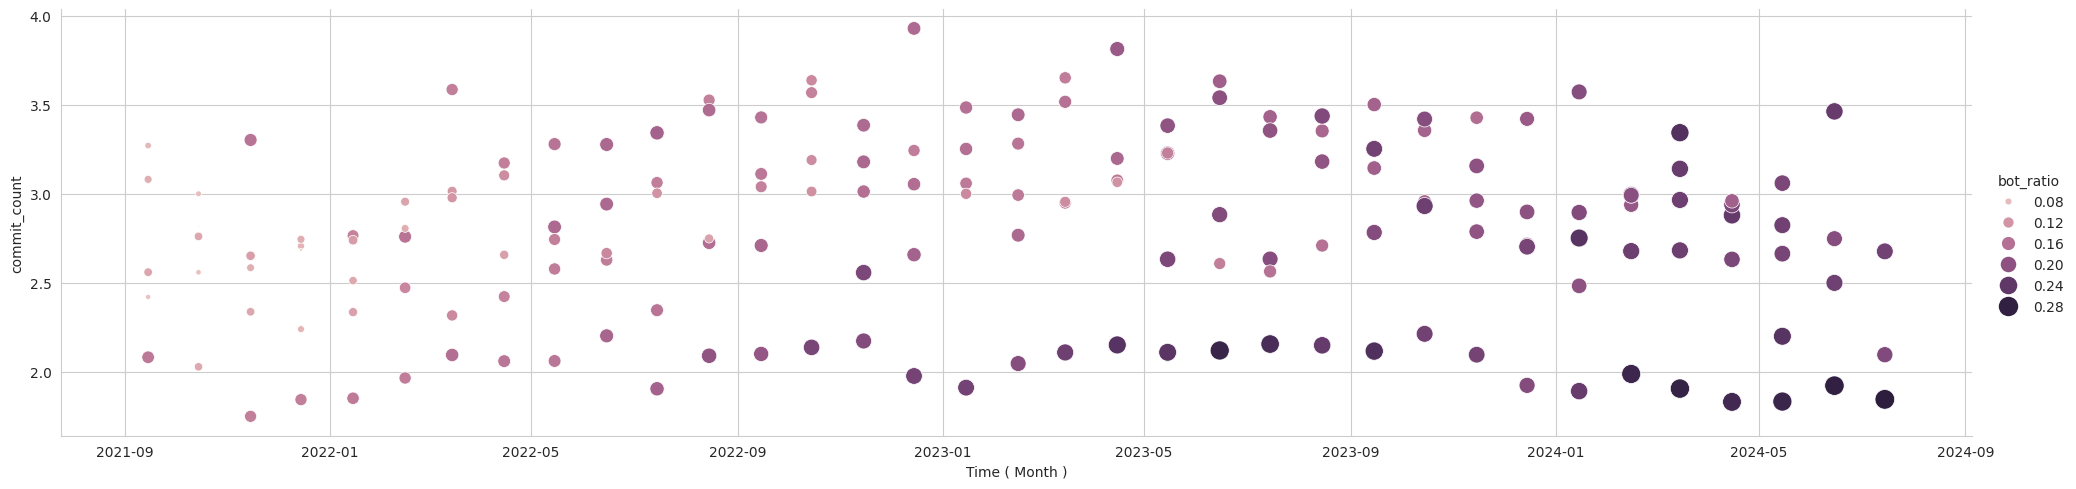

In [70]:
rel = sns.relplot(data = prs_g1,x='time',y='commit_count',size='bot_ratio',hue='bot_ratio',aspect=4,sizes=(1,200))
rel.set_xlabels("Time ( Month )")

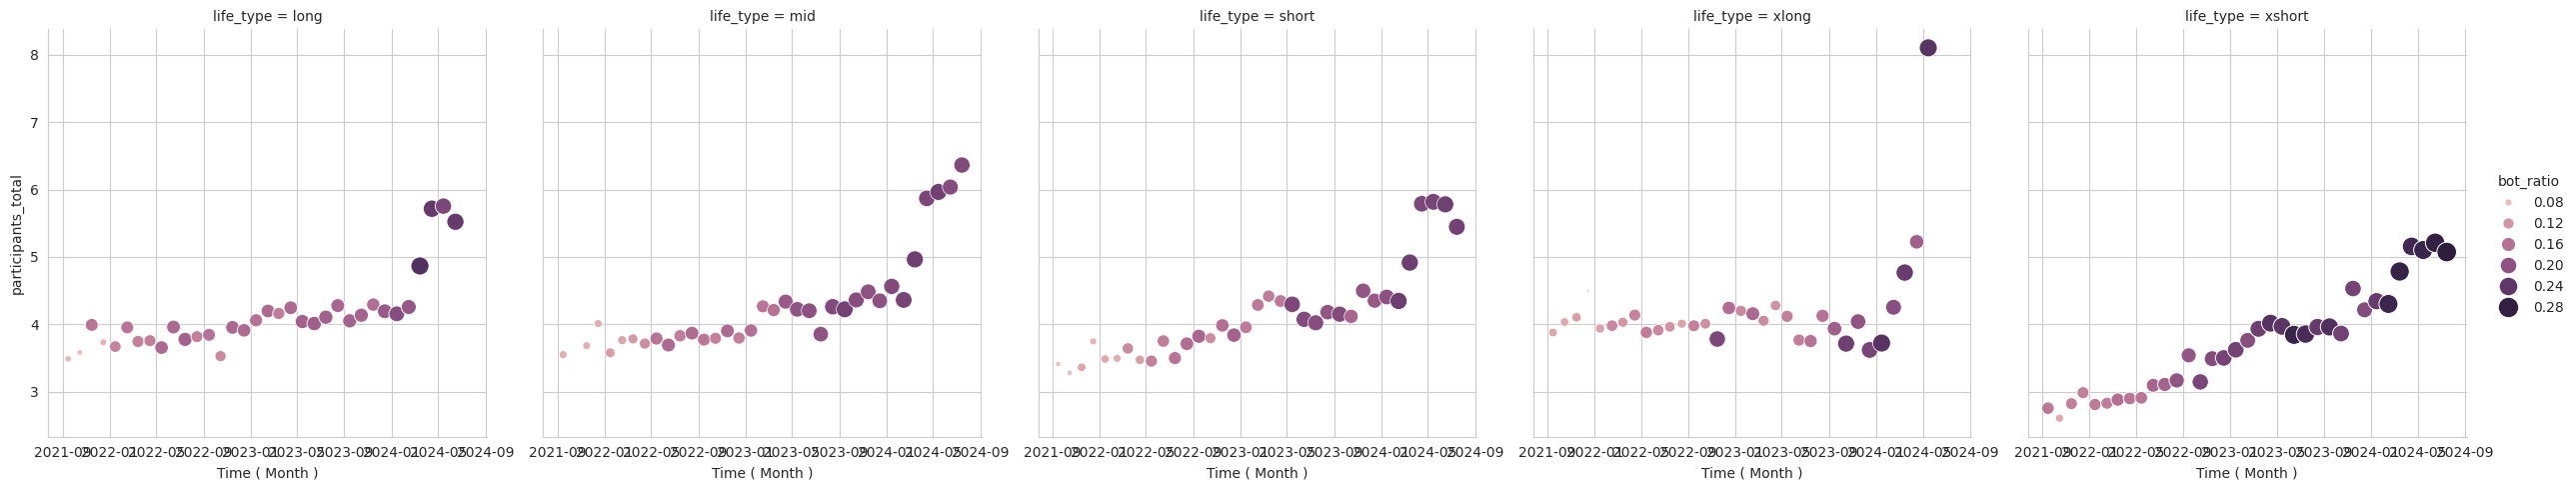

In [74]:
rel = sns.relplot(data = prs_g1,x='time',y='participants_total',size='bot_ratio',hue='bot_ratio',sizes=(1,200),col='life_type')
rel.set_xlabels("Time ( Month )")

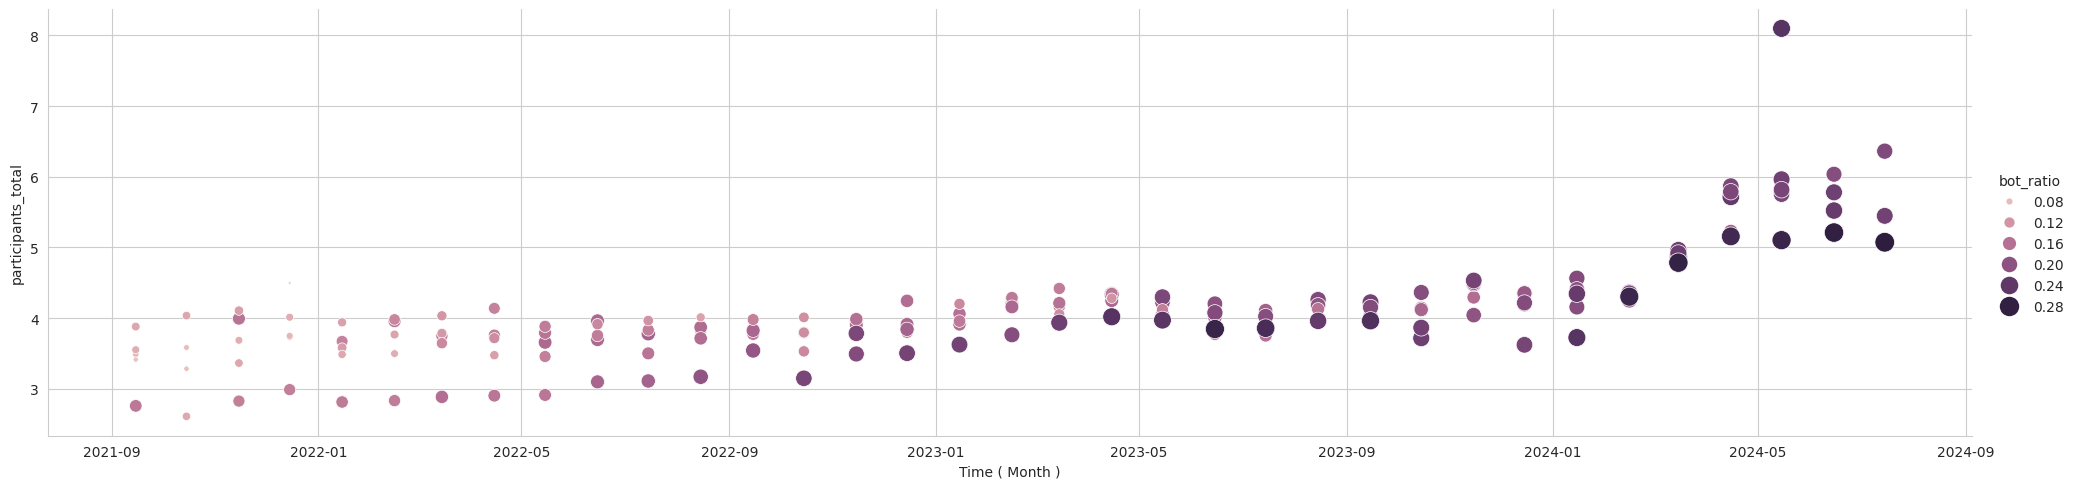

In [72]:
rel = sns.relplot(data = prs_g1,x='time',y='participants_total',size='bot_ratio',hue='bot_ratio',aspect=4,sizes=(1,200))
rel.set_xlabels("Time ( Month )")

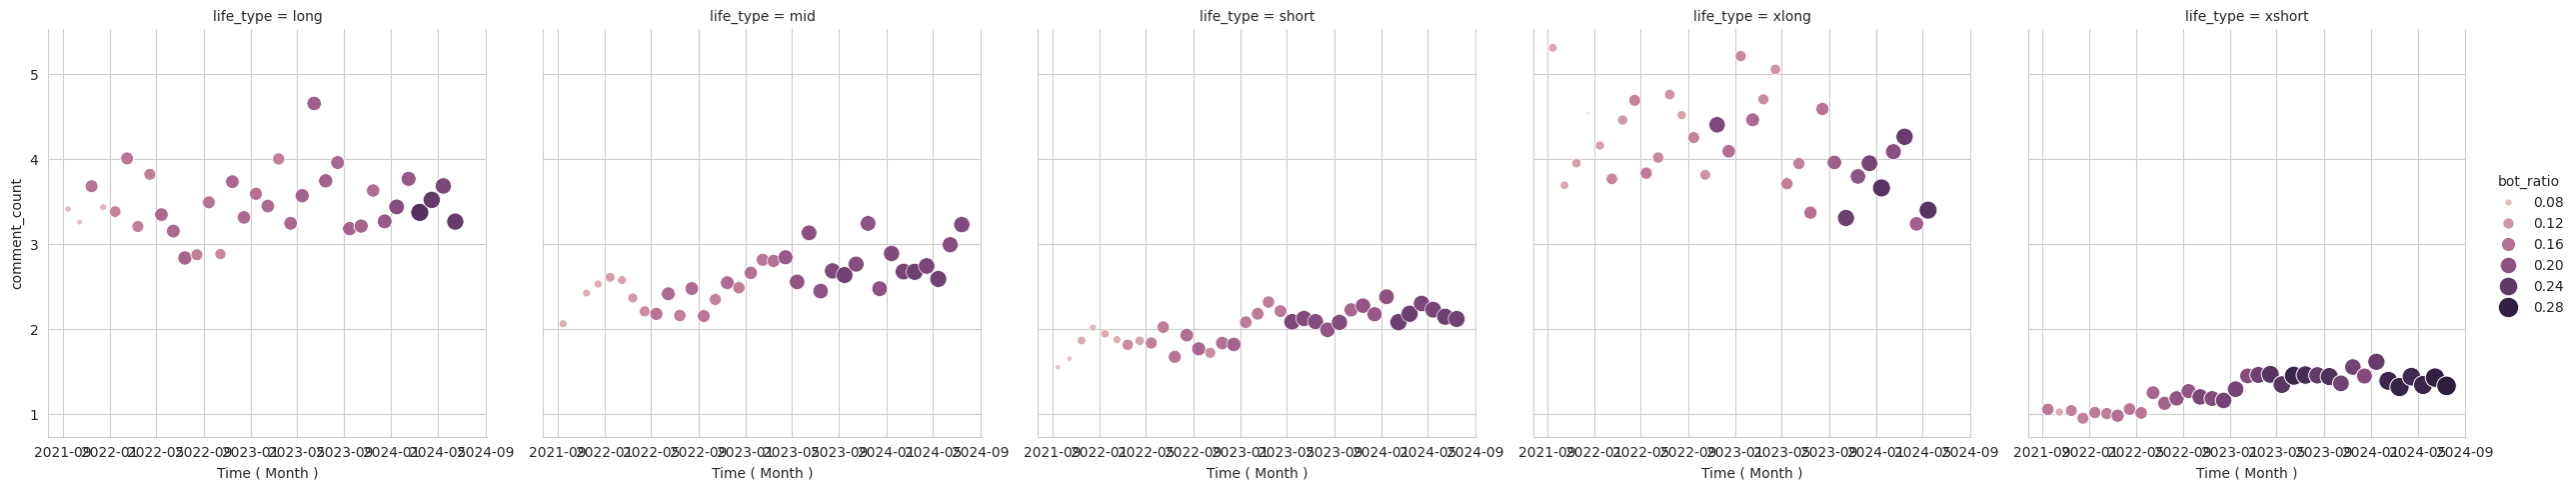

In [75]:
rel = sns.relplot(data = prs_g1,x='time',y='comment_count',size='bot_ratio',hue='bot_ratio',sizes=(1,200),col='life_type')
rel.set_xlabels("Time ( Month )")

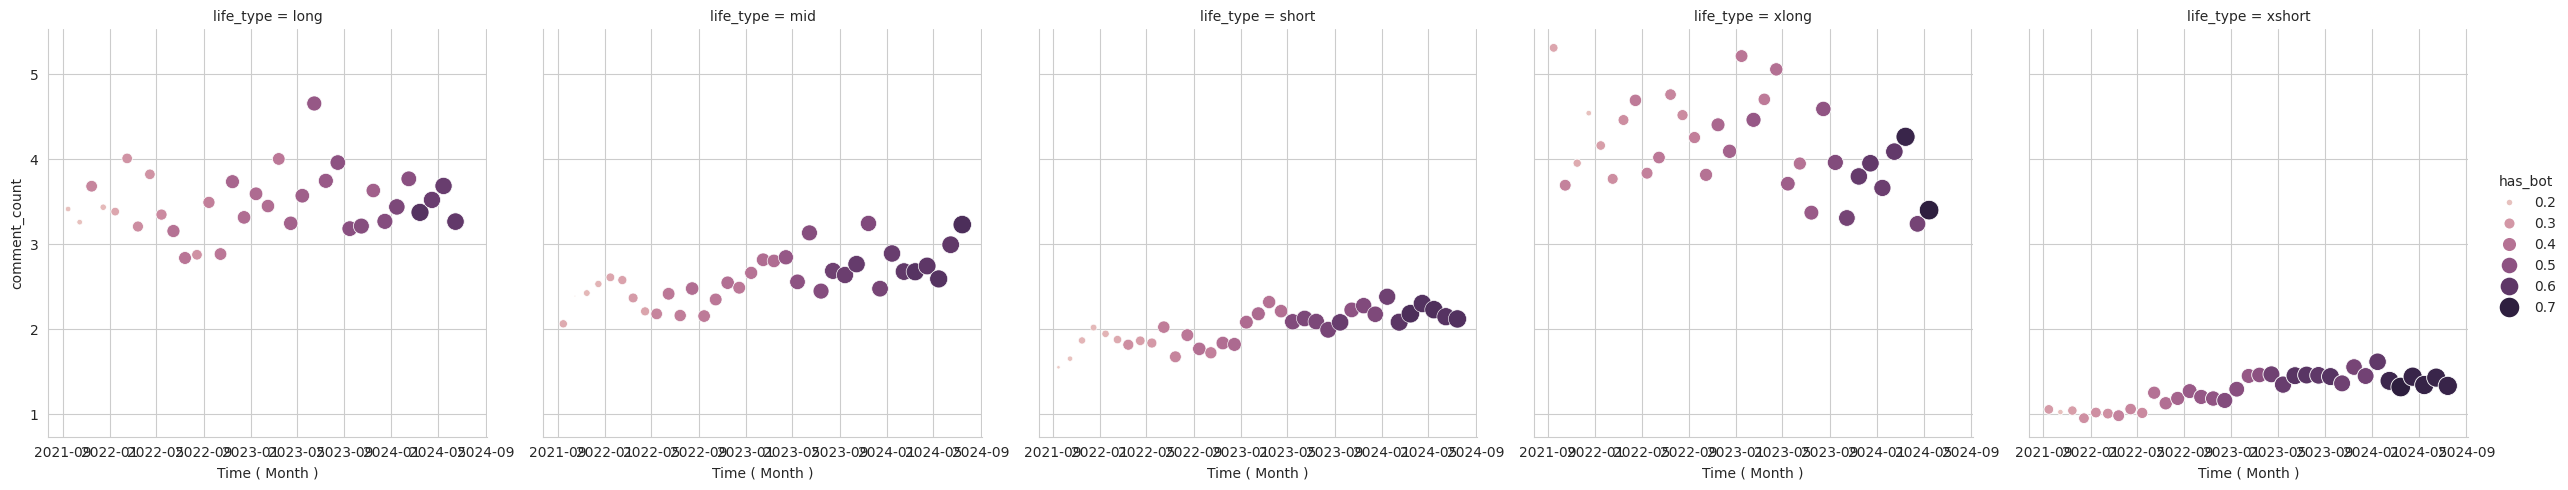

In [76]:
rel = sns.relplot(data = prs_g1,x='time',y='comment_count',size='has_bot',hue='has_bot',sizes=(1,200),col='life_type')
rel.set_xlabels("Time ( Month )")

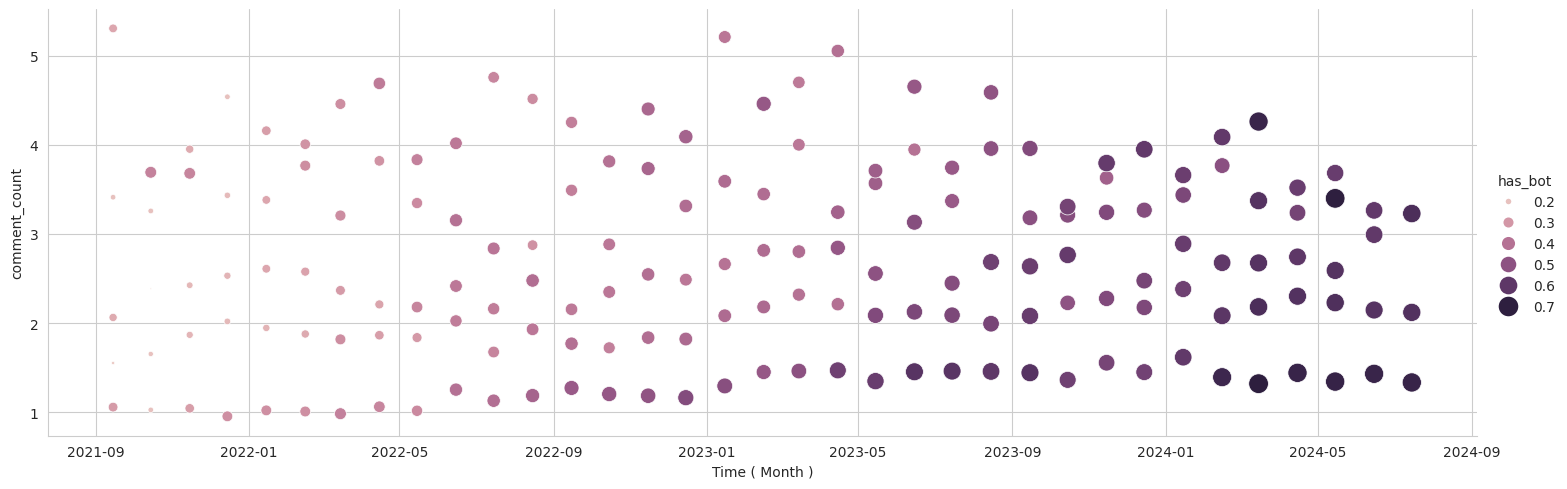

In [78]:
rel = sns.relplot(data = prs_g1,x='time',y='comment_count',size='has_bot',hue='has_bot',sizes=(1,200), aspect = 3)
rel.set_xlabels("Time ( Month )")

In [80]:
iss_g = iss.drop(columns=['rc_ty','url','author','closer','auther_is_closer','end','create_time'])

In [81]:
iss_g['time'] =  iss_g.apply(lambda row: ( dateutil.parser.parse(row.ymonth) ), axis=1 )
iss_g1 = iss_g.groupby(['ymonth','life_type']).mean()
iss_g2 = iss_g.groupby(['ymonth','life_type']).mean()

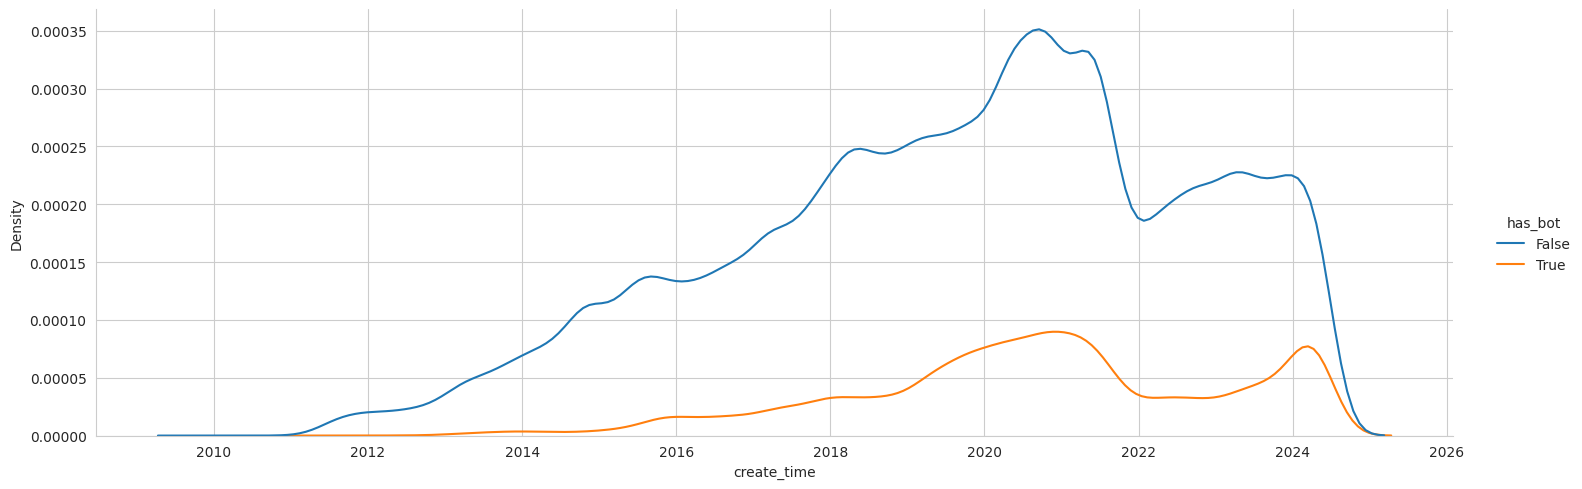

In [82]:
sns.displot(data = iss, kind="kde", x="create_time",hue="has_bot", color = 'darkblue',aspect=3)

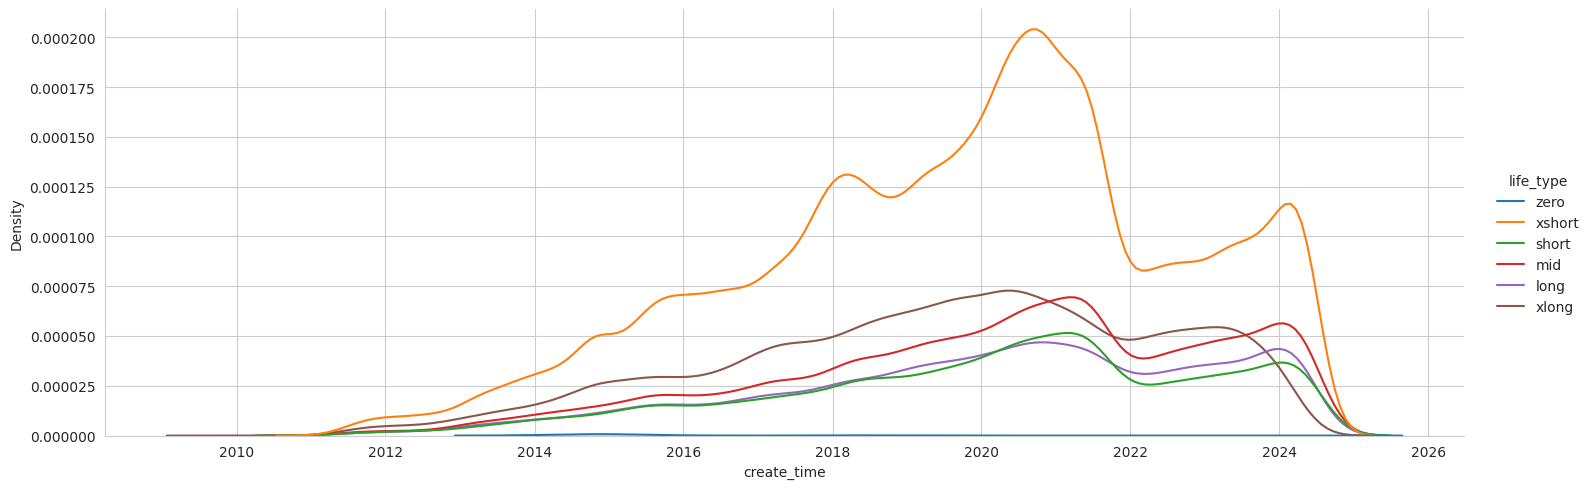

In [97]:
sns.displot(data = iss, kind="kde", x="create_time",hue="life_type", color = 'darkblue',aspect=3)

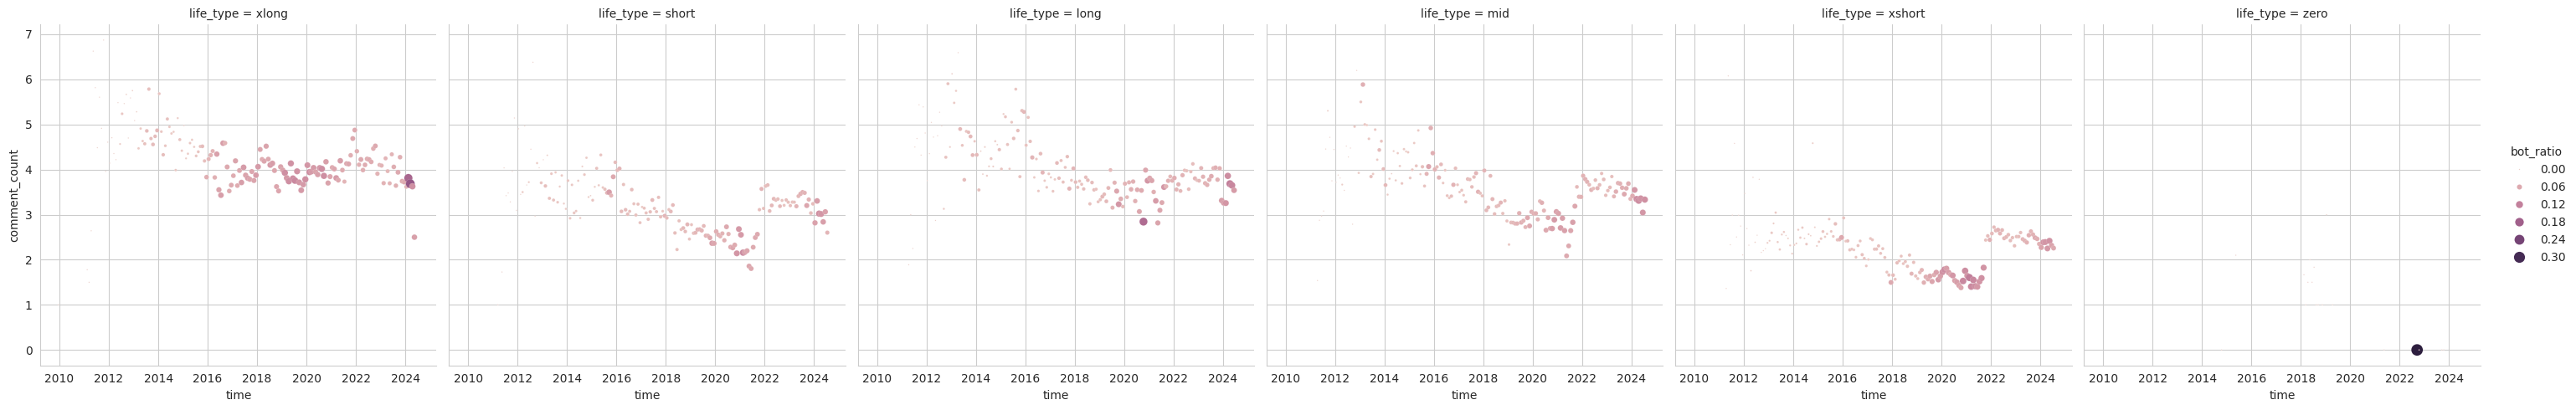

In [85]:
sns.relplot(data = iss_g1,x='time',y='comment_count',col='life_type',size='bot_ratio',sizes=(1,100), hue='bot_ratio')

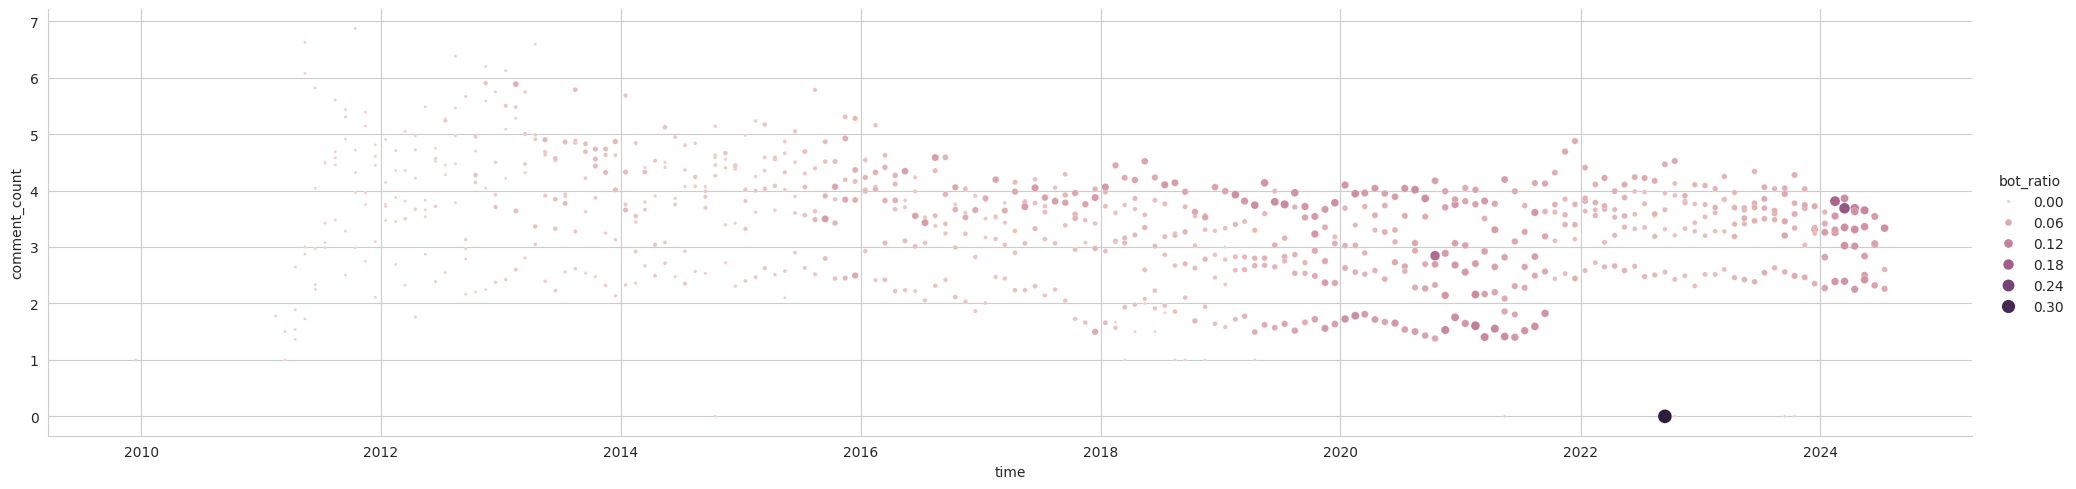

In [89]:
sns.relplot(data = iss_g1,x='time',y='comment_count',size='bot_ratio',sizes=(5,100), hue='bot_ratio', aspect=4)

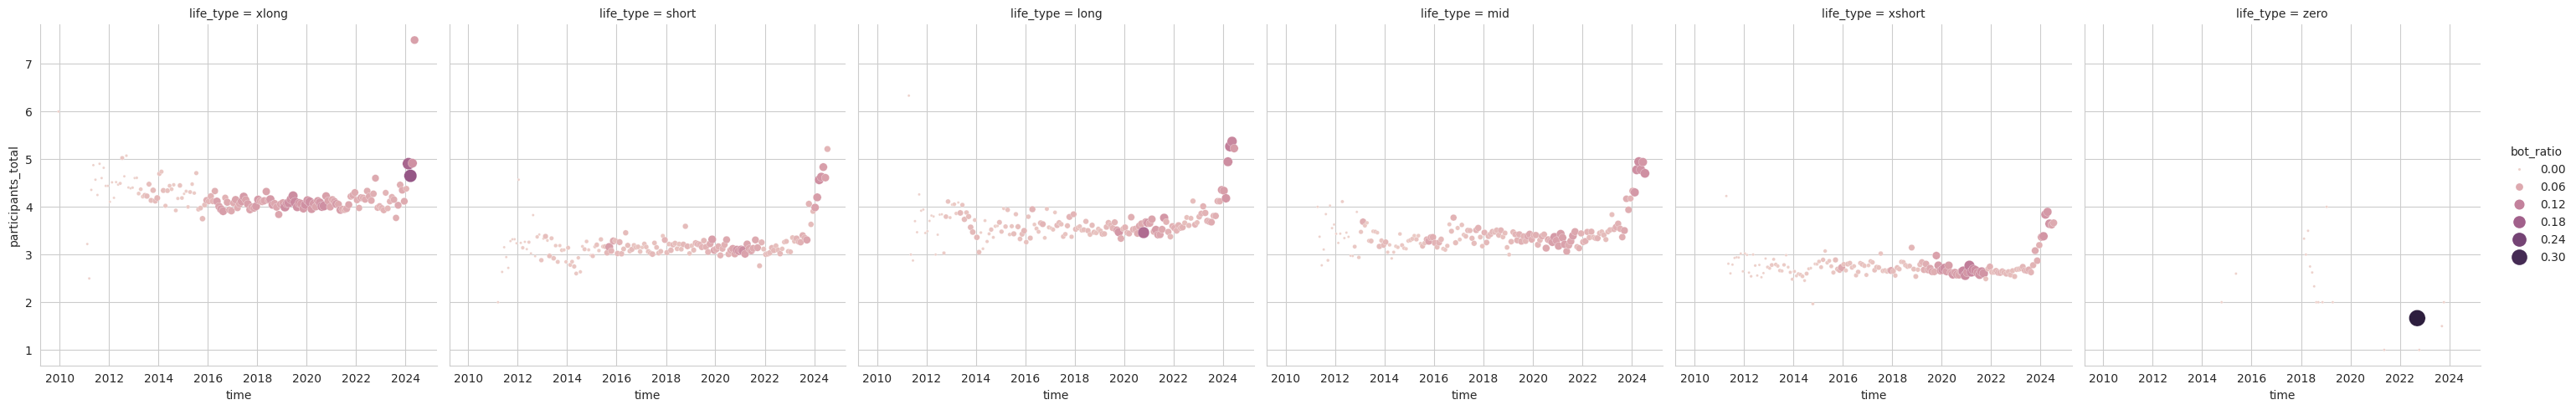

In [90]:
rel = sns.relplot(data = iss_g1,x='time',y='participants_total',size='bot_ratio',hue='bot_ratio',sizes=(5,200),col='life_type')

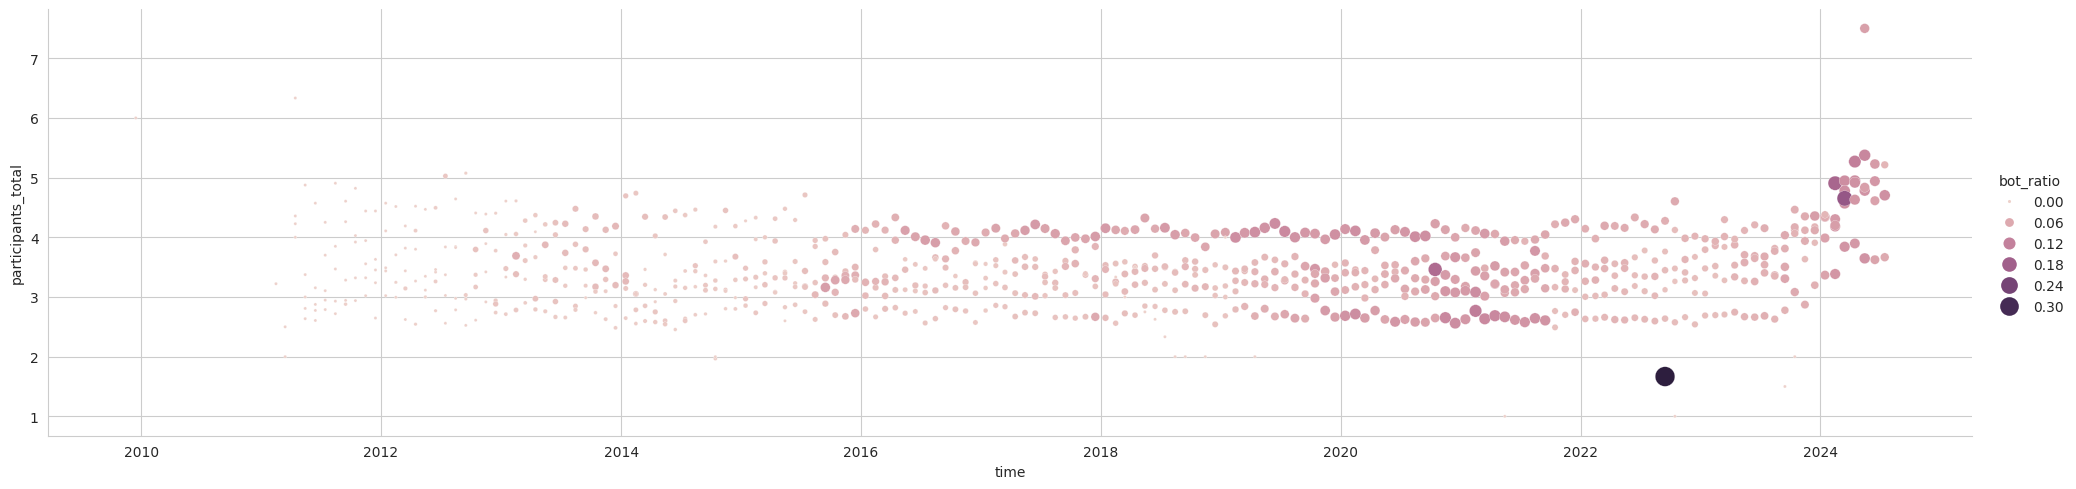

In [92]:
rel = sns.relplot(data = iss_g1,x='time',y='participants_total',size='bot_ratio',hue='bot_ratio',sizes=(5,200),aspect=4)

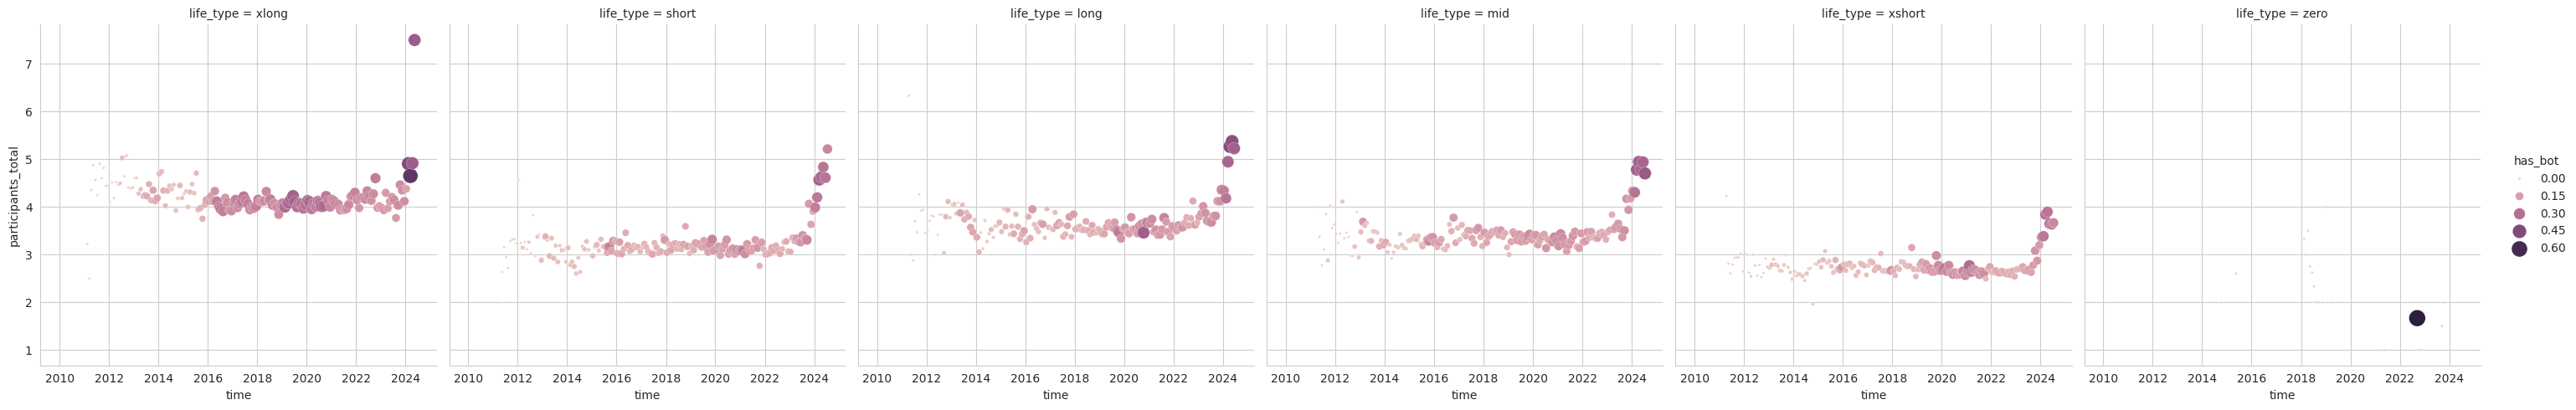

In [93]:
rel = sns.relplot(data = iss_g1,x='time',y='participants_total',size='has_bot',hue='has_bot',sizes=(5,200),col='life_type')

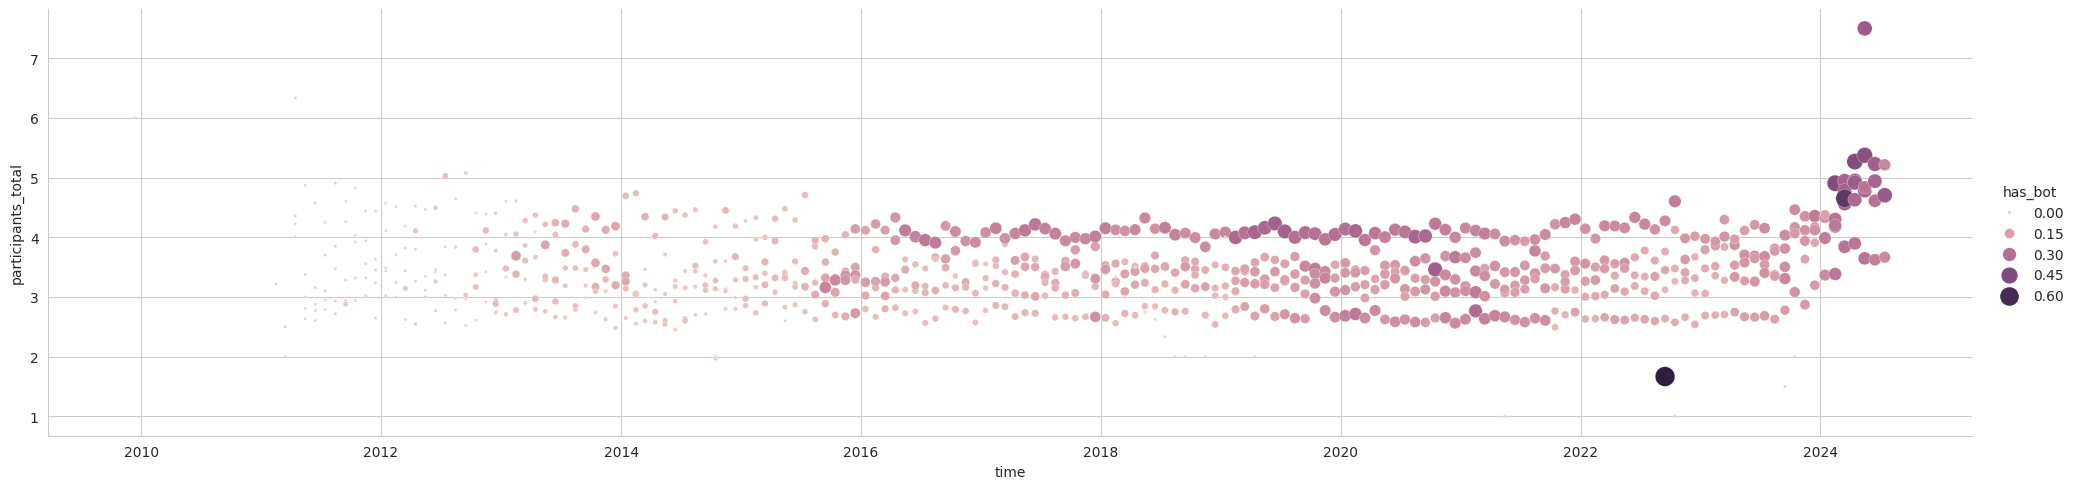

In [94]:
rel = sns.relplot(data = iss_g1,x='time',y='participants_total',size='has_bot',hue='has_bot',sizes=(5,200),aspect=4)

In [95]:
iss

,rc_ty,url,author,closer,auther_is_closer,participants_total,participants_bot,participants_member,participants_contributer,participants_user,...,first_comment_time_sec,commit_count,comment_count,end,bot_ratio,has_bot,life_day,idle_time,ymonth,life_type
132842,Issue,"""https://github.com/fastai/fastbook/issues/443""",User,User,True,1,0,0,0,1,...,-1,0,0,Green,0.0,False,0.000000,0.000000,2021-05,zero
132843,Issue,"""https://github.com/fastai/fastbook/issues/442""",User,User,True,1,0,0,0,1,...,-1,0,0,Green,0.0,False,0.000000,0.000000,2021-05,zero
132844,Issue,"""https://github.com/fastai/fastbook/issues/441""",User,User,True,1,0,0,0,1,...,-1,0,0,Green,0.0,False,0.000000,0.000000,2021-05,zero
177245,Issue,"""https://github.com/microsoft/TypeScript/issue...",User,User,True,2,0,0,0,2,...,-1,0,0,Green,0.0,False,0.000000,0.000000,2023-10,zero
177407,Issue,"""https://github.com/microsoft/TypeScript/issue...",User,User,True,1,0,0,0,1,...,-1,0,0,Green,0.0,False,0.000000,0.000000,2023-09,zero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319456,Issue,"""https://github.com/scrapy/scrapy/issues/113""",User,Member,False,6,0,3,0,3,...,25313542,0,3,Green,0.0,False,4016.555544,0.072943,2012-04,xlong
147090,Issue,"""https://github.com/nodejs/node-v0.x-archive/i...",User,User,False,5,0,0,0,5,...,166992,0,2,Green,0.0,False,4052.971586,0.000477,2012-03,xlong
147306,Issue,"""https://github.com/nodejs/node-v0.x-archive/i...",User,User,False,6,0,1,0,5,...,17215,0,4,Green,0.0,False,4091.350961,0.000049,2012-02,xlong
147776,Issue,"""https://github.com/nodejs/node-v0.x-archive/i...",User,User,False,6,0,0,0,6,...,43908980,0,2,Green,0.0,False,4166.230093,0.121982,2011-11,xlong


In [96]:
iss_g1

participants_total  participants_bot  participants_member  \
ymonth  life_type                                                              
2009-12 xlong                6.000000          0.000000             0.000000   
2011-02 xlong                3.222222          0.000000             0.888889   
2011-03 short                2.000000          0.000000             0.000000   
        xlong                2.500000          0.000000             1.500000   
2011-04 long                 6.333333          0.000000             0.111111   
...                               ...               ...                  ...   
2024-06 short                4.612573          0.359649             0.311404   
        xshort               3.624529          0.273265             0.324906   
2024-07 mid                  4.703704          0.469136             0.148148   
        short                5.214286          0.244048             0.273810   
        xshort               3.665904          0.247140             0.286041   

                   participants_contributer  participants_user  life_time_sec  \
ymonth  life_type                                                               
2009-12 xlong                      0.000000           6.000000   1.141771e+08   
2011-02 xlong                      0.222222           2.111111   4.791340e+07   
2011-03 short                      1.000000           1.000000   1.689730e+05   
        xlong                      0.000000           1.000000   6.754342e+07   
2011-04 long                       0.111111           6.111111   3.155742e+06   
...                                     ...                ...            ...   
2024-06 short                      0.323099           3.618421   1.621477e+05   
        xshort                     0.288865           2.737493   2.447395e+04   
2024-07 mid                        0.370370           3.716049   4.069290e+05   
        short                      0.386905           4.309524   1.435191e+05   
        xshort                     0.299771           2.832952   2.196459e+04   

                   first_event_time_sec  first_comment_time_sec  commit_count  \
ymonth  life_type                                                               
2009-12 xlong                      -1.0            4.834157e+07      0.000000   
2011-02 xlong                      -1.0            2.413783e+07      0.111111   
2011-03 short                      -1.0            3.986400e+04      3.000000   
        xlong                      -1.0            3.936114e+07      0.000000   
2011-04 long                       -1.0            2.956154e+06      0.888889   
...                                 ...                     ...           ...   
2024-06 short                      -1.0            5.701004e+04      0.000000   
        xshort                     -1.0            2.133080e+04      0.000000   
2024-07 mid                        -1.0            1.380254e+05      0.000000   
        short                      -1.0            3.583488e+04      0.000000   
        xshort                     -1.0            8.929934e+03      0.000000   

                   comment_count  bot_ratio   has_bot     life_day  idle_time  \
ymonth  life_type                                                               
2009-12 xlong           1.000000   0.000000  0.000000  1321.494358   0.500000   
2011-02 xlong           1.777778   0.000000  0.000000   554.553229   0.552653   
2011-03 short           1.000000   0.000000  0.000000     1.955706   0.235924   
        xlong           1.500000   0.000000  0.000000   781.752535   0.582755   
2011-04 long            1.888889   0.000000  0.000000    36.524792   0.809125   
...                          ...        ...       ...          ...        ...   
2024-06 short           3.062865   0.069485  0.288012     1.876709   0.361014   
        xshort          2.319527   0.067217  0.243679     0.283263   9.217216   
2024-07 mid             3.333333   0.096488  0.382716     4.